# DATA5000 Workshop 10

## Causal Machine Learning and Predictions

## Automatic Teller Machines Transactions Dataset

#### - load datasets
#### - pre-process data
#### - EDA (opt: suggest dash)
#### - feature engineering
#### - Apply ML: correlations - SHAP
#### - Causal ML: predict causal factors
#### - Predict Treatment Effects, Policies
#### - Forecast: Causal Fusion vs Baseline NeuralProphet

# This notebook needs to save data to and from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
%pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 123.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
%pip install econml shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 15.7 MB/s eta 0:00:00


In [ ]:
%pip install pandas numpy matplotlib seaborn plotly openpyxl numba lightgbm nbformat

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from openpyxl import Workbook

# DATASETS

## Notes:

- you will need to upload the dataset to your Google Drive.
- alternatively, you may download the dataset from this URL: https://s3.ap-southeast-2.wasabisys.com/data5000/ATM_TXNs.xlsx

- you can also load the dataset directly from the URL provided above

In [ ]:
atm_data_file = 'https://s3.ap-southeast-2.wasabisys.com/data5000/ATM_TXNs.xlsx'

# Load directly from cloud storage

# First - the cash constraints (how much cash) and denominations for each ATM i.e., its cash capability

In [ ]:
# cash constraints
atm_data = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/ATM_TXNs.xlsx')
atm_data

,Terminal ID,A_Denomination,A_MaxBills,BDenomination,B_MaxBills,C_Denomination,C_MaxBills,D_Denomination,Max_Load_Calc
0,81139,20,1800,50,1800,0,0,0,126000
1,82644,20,1800,50,1800,0,0,0,126000
2,83173,20,1800,50,1800,0,0,0,126000
3,83221,20,1800,50,1800,0,0,0,126000
4,83222,20,1800,50,1800,0,0,0,126000
5,83223,20,1800,50,1800,0,0,0,126000
6,83416,20,1800,50,1800,0,0,0,126000
7,83417,20,1800,50,1800,0,0,0,126000
8,83418,20,1800,50,1800,0,0,0,126000
9,83419,20,1800,50,1800,0,0,0,126000


# Remember, we can have different labels or names for the same data

In [ ]:
atms = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/ATM_TXNs.xlsx')
atms

,Terminal ID,A_Denomination,A_MaxBills,BDenomination,B_MaxBills,C_Denomination,C_MaxBills,D_Denomination,Max_Load_Calc
0,81139,20,1800,50,1800,0,0,0,126000
1,82644,20,1800,50,1800,0,0,0,126000
2,83173,20,1800,50,1800,0,0,0,126000
3,83221,20,1800,50,1800,0,0,0,126000
4,83222,20,1800,50,1800,0,0,0,126000
5,83223,20,1800,50,1800,0,0,0,126000
6,83416,20,1800,50,1800,0,0,0,126000
7,83417,20,1800,50,1800,0,0,0,126000
8,83418,20,1800,50,1800,0,0,0,126000
9,83419,20,1800,50,1800,0,0,0,126000


# Now the ATM transactions, across all atms, for each day for over 3 years

In [ ]:
atm_txns = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/atm_txns_time.xlsx')
atm_txns

,JournalDate,TerminalID,OpenAmount,DispensedAmount,ClosingBalance,AtmCashed
0,2021-01-01,81139,38730,1240,37490,N
1,2021-01-01,82644,71730,2180,69550,N
2,2021-01-01,83173,63250,1110,62140,N
3,2021-01-01,83221,31920,950,30970,N
4,2021-01-01,83222,80620,1500,79120,N
...,...,...,...,...,...,...
14252,2023-08-23,83420,41980,0,41980,N
14253,2023-08-23,83421,17960,0,17960,N
14254,2023-08-23,83422,46630,0,46630,N
14255,2023-08-23,83423,28870,1140,27730,N


## Make sure that the transaction date is a true datetime object - we will create a new column called TXN_DATE

In [ ]:
# new column
atm_txns['TXN_DATE'] = pd.to_datetime(atm_txns['JournalDate'])
atm_txns

,JournalDate,TerminalID,OpenAmount,DispensedAmount,ClosingBalance,AtmCashed,TXN_DATE
0,2021-01-01,81139,38730,1240,37490,N,2021-01-01
1,2021-01-01,82644,71730,2180,69550,N,2021-01-01
2,2021-01-01,83173,63250,1110,62140,N,2021-01-01
3,2021-01-01,83221,31920,950,30970,N,2021-01-01
4,2021-01-01,83222,80620,1500,79120,N,2021-01-01
...,...,...,...,...,...,...,...
14252,2023-08-23,83420,41980,0,41980,N,2023-08-23
14253,2023-08-23,83421,17960,0,17960,N,2023-08-23
14254,2023-08-23,83422,46630,0,46630,N,2023-08-23
14255,2023-08-23,83423,28870,1140,27730,N,2023-08-23


# Important: connect to Google Drive to persist data!!!

## In your Google Drive, create a folder called "atm_txns"
## Get its PATH in Google Drive

In [ ]:
# your Google drive PATH will look something like this
your_google_drive_PATH = '/content/sample_data/atm_txns/'

In [ ]:
# now save to your google drive
atm_txns.to_csv('/content/sample_data/atm_txns/atm_txns.csv', index=False)

# List columns

In [ ]:
atm_txns.columns.to_list()

['JournalDate',
 'TerminalID',
 'OpenAmount',
 'DispensedAmount',
 'ClosingBalance',
 'AtmCashed',
 'TXN_DATE']

## Compare whether the ATMS are cashed or not i.e., if they got refilled

In [ ]:
atm_txns['AtmCashed'].value_counts()

,count
AtmCashed,
N,13751
Y,506


## Sort ATM terminal IDs

## How many terminals do we have?

In [ ]:
atm_txns['TerminalID'].value_counts()

,count
TerminalID,
81139,965
82644,965
83173,965
83221,965
83222,965
83223,965
83422,945
83417,943
83420,943


# Separate into terminals

In [ ]:
# Group the DataFrame by 'TerminalID'
grouped = atm_txns.groupby('TerminalID')

# Iterate through groups and print the relevant data
for name, group in grouped:
    print(f"TerminalID: {name}")
    print(group[['TXN_DATE', 'OpenAmount', 'DispensedAmount', 'ClosingBalance', 'AtmCashed']])
    print("\n")

TerminalID: 81139
        TXN_DATE  OpenAmount  DispensedAmount  ClosingBalance AtmCashed
0     2021-01-01       38730             1240           37490         N
6     2021-01-02       37490              970           36520         N
12    2021-01-03       36520             1170           35350         N
18    2021-01-04       35350             2600           32750         N
24    2021-01-05       32750             2740           30010         N
...          ...         ...              ...             ...       ...
14182 2023-08-19       25570             5610           19960         N
14197 2023-08-20       19960              900           19060         N
14212 2023-08-21       19060             1570           17490         N
14227 2023-08-22       17490             1660           15830         N
14242 2023-08-23       15830                0           15830         N

[965 rows x 5 columns]


TerminalID: 82644
        TXN_DATE  OpenAmount  DispensedAmount  ClosingBalance AtmCashed
1 

In [ ]:
# Create a list to hold the individual DataFrames for each group
grouped_dfs = []

# Iterate through groups and create DataFrames
for name, group in grouped:
    grouped_dfs.append(group)

# Concatenate the individual DataFrames into a new DataFrame
new_df = pd.concat(grouped_dfs, ignore_index=True)

# Display the new DataFrame
print(new_df)

      JournalDate  TerminalID  OpenAmount  DispensedAmount  ClosingBalance  \
0      2021-01-01       81139       38730             1240           37490   
1      2021-01-02       81139       37490              970           36520   
2      2021-01-03       81139       36520             1170           35350   
3      2021-01-04       81139       35350             2600           32750   
4      2021-01-05       81139       32750             2740           30010   
...           ...         ...         ...              ...             ...   
14252  2023-08-19       83424       73730             5920           67810   
14253  2023-08-20       83424       67810             2110           65700   
14254  2023-08-21       83424       65700             4110           61590   
14255  2023-08-22       83424       61590            10190           51400   
14256  2023-08-23       83424       51400             3320           48080   

      AtmCashed   TXN_DATE  
0             N 2021-01-01  
1    

In [ ]:
new_df

,JournalDate,TerminalID,OpenAmount,DispensedAmount,ClosingBalance,AtmCashed,TXN_DATE
0,2021-01-01,81139,38730,1240,37490,N,2021-01-01
1,2021-01-02,81139,37490,970,36520,N,2021-01-02
2,2021-01-03,81139,36520,1170,35350,N,2021-01-03
3,2021-01-04,81139,35350,2600,32750,N,2021-01-04
4,2021-01-05,81139,32750,2740,30010,N,2021-01-05
...,...,...,...,...,...,...,...
14252,2023-08-19,83424,73730,5920,67810,N,2023-08-19
14253,2023-08-20,83424,67810,2110,65700,N,2023-08-20
14254,2023-08-21,83424,65700,4110,61590,N,2023-08-21
14255,2023-08-22,83424,61590,10190,51400,N,2023-08-22


# Group data to individual terminals

In [ ]:
# Create a dictionary of DataFrames, one for each unique TerminalID
dfs_by_terminal = {}
unique_terminals = atm_txns['TerminalID'].unique()

for terminal_id in unique_terminals:
    terminal_df = atm_txns[atm_txns['TerminalID'] == terminal_id]
    terminal_df = terminal_df[['TXN_DATE', 'OpenAmount', 'DispensedAmount', 'ClosingBalance', 'AtmCashed']]
    terminal_df.set_index('TXN_DATE', inplace=True)
    dfs_by_terminal[terminal_id] = terminal_df

# Access individual DataFrames by TerminalID
for terminal_id, terminal_df in dfs_by_terminal.items():
    print(f"TerminalID: {terminal_id}")
    print(terminal_df)
    print("\n")

TerminalID: 81139
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TXN_DATE                                                         
2021-01-01       38730             1240           37490         N
2021-01-02       37490              970           36520         N
2021-01-03       36520             1170           35350         N
2021-01-04       35350             2600           32750         N
2021-01-05       32750             2740           30010         N
...                ...              ...             ...       ...
2023-08-19       25570             5610           19960         N
2023-08-20       19960              900           19060         N
2023-08-21       19060             1570           17490         N
2023-08-22       17490             1660           15830         N
2023-08-23       15830                0           15830         N

[965 rows x 4 columns]


TerminalID: 82644
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TXN_DATE      

# we can now access individual terminals like this:

In [ ]:
# Access individual DataFrames by TerminalID
for terminal_id, terminal_df in dfs_by_terminal.items():
    print(f"TerminalID: {terminal_id}")
    print(terminal_df)
    print("\n")

TerminalID: 81139
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TXN_DATE                                                         
2021-01-01       38730             1240           37490         N
2021-01-02       37490              970           36520         N
2021-01-03       36520             1170           35350         N
2021-01-04       35350             2600           32750         N
2021-01-05       32750             2740           30010         N
...                ...              ...             ...       ...
2023-08-19       25570             5610           19960         N
2023-08-20       19960              900           19060         N
2023-08-21       19060             1570           17490         N
2023-08-22       17490             1660           15830         N
2023-08-23       15830                0           15830         N

[965 rows x 4 columns]


TerminalID: 82644
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TXN_DATE      

In [ ]:
# Create separate DataFrames with variable names following the pattern "df_TerminalID"
dfs_by_terminal = {}
unique_terminals = atm_txns['TerminalID'].unique()

for terminal_id in unique_terminals:
    terminal_df = atm_txns[atm_txns['TerminalID'] == terminal_id]
    terminal_df = terminal_df[['TXN_DATE', 'OpenAmount', 'DispensedAmount', 'ClosingBalance', 'AtmCashed']]
    terminal_df.set_index('TXN_DATE', inplace=True)
    # Create a variable name for the DataFrame
    var_name = f"df_{terminal_id}"
    dfs_by_terminal[var_name] = terminal_df

# Access individual DataFrames by variable name
for var_name, terminal_df in dfs_by_terminal.items():
    print(f"Variable Name: {var_name}")
    print(terminal_df)
    print("\n")

Variable Name: df_81139
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TXN_DATE                                                         
2021-01-01       38730             1240           37490         N
2021-01-02       37490              970           36520         N
2021-01-03       36520             1170           35350         N
2021-01-04       35350             2600           32750         N
2021-01-05       32750             2740           30010         N
...                ...              ...             ...       ...
2023-08-19       25570             5610           19960         N
2023-08-20       19960              900           19060         N
2023-08-21       19060             1570           17490         N
2023-08-22       17490             1660           15830         N
2023-08-23       15830                0           15830         N

[965 rows x 4 columns]


Variable Name: df_82644
            OpenAmount  DispensedAmount  ClosingBalance AtmCashed
TX

# Save individual ATM transaction data (time series) to Google Drive

## Remember to first make a folder in your Google drive.
## In this example, the folder is called "terminals"

In [ ]:
terminal_folder_PATH = '/content/sample_data/atm_txns/'

In [ ]:
# Create separate DataFrames with variable names following the pattern "df_TerminalID"
dfs_by_terminal = {}
unique_terminals = atm_txns['TerminalID'].unique()

for terminal_id in unique_terminals:
    terminal_df = atm_txns[atm_txns['TerminalID'] == terminal_id]
    terminal_df = terminal_df[['TXN_DATE', 'OpenAmount', 'DispensedAmount', 'ClosingBalance', 'AtmCashed']]
    terminal_df.set_index('TXN_DATE', inplace=True)
    # Create a variable name for the DataFrame
    var_name = f"df_{terminal_id}"
    dfs_by_terminal[var_name] = terminal_df

# Save each individual DataFrame as a CSV
for var_name, terminal_df in dfs_by_terminal.items():
    # Define the CSV file name
    csv_file_name = f"{var_name}.csv"
    # Save the DataFrame to a CSV file
    terminal_df.to_csv(terminal_folder_PATH + csv_file_name)

# Read any terminal data:

In [ ]:
terminal81139 = pd.read_csv('/content/sample_data/atm_txns/df_81139.csv')
terminal81139

,TXN_DATE,OpenAmount,DispensedAmount,ClosingBalance,AtmCashed
0,2021-01-01,38730,1240,37490,N
1,2021-01-02,37490,970,36520,N
2,2021-01-03,36520,1170,35350,N
3,2021-01-04,35350,2600,32750,N
4,2021-01-05,32750,2740,30010,N
...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N
961,2023-08-20,19960,900,19060,N
962,2023-08-21,19060,1570,17490,N
963,2023-08-22,17490,1660,15830,N


# Rename columns for fun :)

In [ ]:
terminal81139.rename(columns={
    'TXN_DATE': 'date',
    'OpenAmount': 'open',
    'ClosingBalance': 'close',
    'DispensedAmount': 'txn',
    'AtmCashed': 'atmcash'
}, inplace=True)

In [ ]:
terminal81139

,date,open,txn,close,atmcash
0,2021-01-01,38730,1240,37490,N
1,2021-01-02,37490,970,36520,N
2,2021-01-03,36520,1170,35350,N
3,2021-01-04,35350,2600,32750,N
4,2021-01-05,32750,2740,30010,N
...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N
961,2023-08-20,19960,900,19060,N
962,2023-08-21,19060,1570,17490,N
963,2023-08-22,17490,1660,15830,N


# Now that each ATMS have been separated, save individual ATM transaction to your Google drive.

## The example Google drive PATH is "/content/drive/MyDrive/atms", where the new folder is called "atms"

In [ ]:
terminal81139.to_csv('/content/sample_data/atm_txns/terminal81139.csv', index=False)

### So that the data format that we want is:

## Make sure you create a new folder and get its PATH

## Let's call this folder "timeseries"

In [ ]:
timeseries_PATH = '/content/drive/MyDrive/timeseries/'

In [ ]:
# Create separate DataFrames with variable names following the pattern "df_TerminalID"

dfs_by_terminal = {}
unique_terminals = atm_txns['TerminalID'].unique()

for terminal_id in unique_terminals:
    terminal_df = atm_txns[atm_txns['TerminalID'] == terminal_id]
    terminal_df = terminal_df[['TXN_DATE', 'OpenAmount', 'DispensedAmount', 'ClosingBalance', 'AtmCashed']
                           ].rename(columns={
        'TXN_DATE': f'TXN_DATE{terminal_id}',
        'OpenAmount': f'OPEN{terminal_id}',
        'DispensedAmount': f'TXN{terminal_id}',
        'ClosingBalance': f'CLOSE{terminal_id}',
        'AtmCashed': f'ATMCASH{terminal_id}'
    })

    terminal_df.set_index(f'TXN_DATE{terminal_id}', inplace=True)

    # Create a variable name for the DataFrame
    var_name = f"df_{terminal_id}"
    dfs_by_terminal[var_name] = terminal_df

# Save each individual DataFrame as a CSV with 'txntimes' suffix
for var_name, terminal_df in dfs_by_terminal.items():
    terminal_id = var_name.split("_")[1]
    csv_file_name = f"txntimes{terminal_id}.csv"
    terminal_df.to_csv(timeseries_PATH + csv_file_name)

## Test read an individual terminal

In [ ]:
txntimes81139 = pd.read_csv('/content/drive/MyDrive/timeseries/txntimes81139.csv')
txntimes81139

,TXN_DATE81139,OPEN81139,TXN81139,CLOSE81139,ATMCASH81139
0,2021-01-01,38730,1240,37490,N
1,2021-01-02,37490,970,36520,N
2,2021-01-03,36520,1170,35350,N
3,2021-01-04,35350,2600,32750,N
4,2021-01-05,32750,2740,30010,N
...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N
961,2023-08-20,19960,900,19060,N
962,2023-08-21,19060,1570,17490,N
963,2023-08-22,17490,1660,15830,N


### Consider ATM Constraints

In [ ]:
atm_txns

,JournalDate,TerminalID,OpenAmount,DispensedAmount,ClosingBalance,AtmCashed,TXN_DATE
0,2021-01-01,81139,38730,1240,37490,N,2021-01-01
1,2021-01-01,82644,71730,2180,69550,N,2021-01-01
2,2021-01-01,83173,63250,1110,62140,N,2021-01-01
3,2021-01-01,83221,31920,950,30970,N,2021-01-01
4,2021-01-01,83222,80620,1500,79120,N,2021-01-01
...,...,...,...,...,...,...,...
14252,2023-08-23,83420,41980,0,41980,N,2023-08-23
14253,2023-08-23,83421,17960,0,17960,N,2023-08-23
14254,2023-08-23,83422,46630,0,46630,N,2023-08-23
14255,2023-08-23,83423,28870,1140,27730,N,2023-08-23


In [ ]:
atm_data

,Terminal ID,A_Denomination,A_MaxBills,BDenomination,B_MaxBills,C_Denomination,C_MaxBills,D_Denomination,Max_Load_Calc
0,81139,20,1800,50,1800,0,0,0,126000
1,82644,20,1800,50,1800,0,0,0,126000
2,83173,20,1800,50,1800,0,0,0,126000
3,83221,20,1800,50,1800,0,0,0,126000
4,83222,20,1800,50,1800,0,0,0,126000
5,83223,20,1800,50,1800,0,0,0,126000
6,83416,20,1800,50,1800,0,0,0,126000
7,83417,20,1800,50,1800,0,0,0,126000
8,83418,20,1800,50,1800,0,0,0,126000
9,83419,20,1800,50,1800,0,0,0,126000


In [ ]:
atm_data.to_csv('atm_data.csv', index=False)

In [ ]:
# Specify the PATH where the CSV files will be saved
atm_time_output_path = '/content/drive/MyDrive/atm_time/'

## Now we can create a dataframe for each ATM terminal - then save as CSV data format
### Note constraints data for each ATM terminal have been added as additional columns

In [ ]:
# Read the CSV data
df = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/atm_txns.csv')

In [ ]:
import os
import pandas as pd

# Read the CSV data
# df = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/atm_txns.csv')

# Specify the PATH where the CSV files will be saved
# atm_time_output_path = '/content/drive/MyDrive/atm_time/'

# Ensure the output directory exists
os.makedirs(atm_time_output_path, exist_ok=True)

# Iterate through unique TerminalIDs and create separate dataframes
for terminal_id in df['TerminalID'].unique():
    terminal_df = df[df['TerminalID'] == terminal_id]

    # Create column suffixes
    col_suffix = f'_{terminal_id}'

    # Rename columns
    terminal_df = terminal_df.rename(columns={
        'JournalDate': 'TXN_DATE',
        'OpenAmount': f'OPEN{col_suffix}',
        'DispensedAmount': f'TXN{col_suffix}',
        'ClosingBalance': f'CLOSE{col_suffix}',
        'AtmCashed': f'ATMCASHED{col_suffix}',
    })

    # Remove the 'TerminalID' column
    terminal_df = terminal_df.drop(columns=['TerminalID'])

    # Set 'TXN_DATE' as the first column
    cols = ['TXN_DATE'] + [col for col in terminal_df if col != 'TXN_DATE']
    terminal_df = terminal_df[cols]

    # Load constraints data
    constraints_df = pd.read_csv('atm_data.csv')

    # Filter constraints data for the current terminal ID
    constraints_data = constraints_df[constraints_df['Terminal ID'] == terminal_id]

    # Rename columns from constraints data with suffix
    renamed_columns = {
        'A_Denomination': f'ADENOM{col_suffix}',
        'A_MaxBills': f'AMAXBILLS{col_suffix}',
        'BDenomination': f'BDENOM{col_suffix}',
        'B_MaxBills': f'BMAXBILLS{col_suffix}',
        'C_Denomination': f'CDENOM{col_suffix}',
        'C_MaxBills': f'CMAXBILLS{col_suffix}',
        'D_Denomination': f'DDENOM{col_suffix}',
        'Max_Load_Calc': f'MAXLOADCALC{col_suffix}',
    }

    # Add columns from constraints data to the terminal DataFrame
    for column_name, new_column_name in renamed_columns.items():
        terminal_df[new_column_name] = constraints_data[column_name].values[0]

        terminal_df = terminal_df.loc[:,~terminal_df.T.duplicated(keep='first')]

    # Save the resulting DataFrame to a CSV file
    output_file = os.path.join(atm_time_output_path, f'ATMTERM{terminal_id}.csv')
    terminal_df.to_csv(output_file, index=False)

# ATM Terminal ID Time Series Data

### Examine data for a single ATM terminal

In [ ]:
atm_term81139 = pd.read_csv('/content/drive/MyDrive/atm_time/ATMTERM81139.csv')
atm_term81139

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
0,2021-01-01,38730,1240,37490,N,20,1800,50,0,126000
1,2021-01-02,37490,970,36520,N,20,1800,50,0,126000
2,2021-01-03,36520,1170,35350,N,20,1800,50,0,126000
3,2021-01-04,35350,2600,32750,N,20,1800,50,0,126000
4,2021-01-05,32750,2740,30010,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000
961,2023-08-20,19960,900,19060,N,20,1800,50,0,126000
962,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000
963,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000


In [ ]:
atm_term81139.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TXN_DATE           965 non-null    object
 1   OPEN_81139         965 non-null    int64 
 2   TXN_81139          965 non-null    int64 
 3   CLOSE_81139        965 non-null    int64 
 4   ATMCASHED_81139    965 non-null    object
 5   ADENOM_81139       965 non-null    int64 
 6   AMAXBILLS_81139    965 non-null    int64 
 7   BDENOM_81139       965 non-null    int64 
 8   CDENOM_81139       965 non-null    int64 
 9   MAXLOADCALC_81139  965 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 75.5+ KB


In [ ]:
%pip install nbformat

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(atm_term81139, x='TXN_DATE', y="OPEN_81139", title="ATM 81139 OPEN")
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(data_frame=atm_term81139, x='TXN_DATE', y="OPEN_81139", title="ATM 81139 OPEN")
fig.write_html('first_figure.html', auto_open=True)

### We can load each CSV and merge them into a "super" dataset for all ATM terminals

In [ ]:
# Specify the PATH where the CSV files are stored
atm_time_input_path = '/content/drive/MyDrive/atm_time/'

In [ ]:
import os
import pandas as pd

# Specify the PATH where the CSV files are stored
#atm_time_input_path = '/content/drive/MyDrive/atm_time/'

# Get a list of CSV files in the directory
csv_files = [f for f in os.listdir(atm_time_input_path) if f.endswith(".csv")]

# Create an empty list to store dataframes
dataframes = []

# Load each CSV data and create dataframes
for csv_file in csv_files:
    terminal_id = os.path.splitext(os.path.basename(csv_file))[0].replace('terminal_', '')
    terminal_df = pd.read_csv(os.path.join(atm_time_input_path, csv_file))

    # Rename columns to include terminal_id as suffix
    columns_to_rename = ['OPEN', 'TXN', 'CLOSE', 'ATMCASHED']
    for col in columns_to_rename:
        old_col_name = f'{col}_{terminal_id}'
        new_col_name = f'{col}_{terminal_id}'
        terminal_df.rename(columns={old_col_name: new_col_name}, inplace=True)

    dataframes.append(terminal_df)

# Merge the dataframes into one combined dataframe based on the 'TXN_DATE' column
combined_df = dataframes[0]
for i in range(1, len(dataframes)):
    combined_df = pd.merge(combined_df, dataframes[i], on='TXN_DATE')

# Save the combined dataframe to a CSV file
combined_df.to_csv(os.path.join(atm_time_input_path + 'combined_terminal_data.csv'), index=False)

# Feature Engineering Time Series Data

In [ ]:
%pip install tsfresh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
combined = pd.read_csv('/content/drive/MyDrive/atm_time/combined_terminal_data.csv')
combined

,TXN_DATE,OPEN_83416,TXN_83416,CLOSE_83416,ATMCASHED_83416,ADENOM_83416,AMAXBILLS_83416,BDENOM_83416,CDENOM_83416,MAXLOADCALC_83416,...,MAXLOADCALC_83420,OPEN_83222,TXN_83222,CLOSE_83222,ATMCASHED_83222,ADENOM_83222,AMAXBILLS_83222,BDENOM_83222,CDENOM_83222,MAXLOADCALC_83222
0,2021-01-29,-1190,200,-1390,N,20,1800,50,0,126000,...,126000,78810,1950,76860,N,20,1800,50,0,126000
1,2021-01-30,-1390,0,-1390,N,20,1800,50,0,126000,...,126000,76860,2740,74120,N,20,1800,50,0,126000
2,2021-01-31,-1390,50,-1440,N,20,1800,50,0,126000,...,126000,74120,1650,72470,N,20,1800,50,0,126000
3,2021-02-01,-1440,0,-1440,N,20,1800,50,0,126000,...,126000,72470,2150,70320,N,20,1800,50,0,126000
4,2021-02-02,-1440,510,-1950,N,20,1800,50,0,126000,...,126000,70320,2750,67570,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,10490,1460,9030,N,20,1800,50,0,126000,...,126000,46010,3170,42840,N,20,1800,50,0,126000
933,2023-08-20,9030,280,8750,N,20,1800,50,0,126000,...,126000,42840,1140,41700,N,20,1800,50,0,126000
934,2023-08-21,8750,440,8310,N,20,1800,50,0,126000,...,126000,41700,1680,40020,N,20,1800,50,0,126000
935,2023-08-22,8310,0,8310,N,20,1800,50,0,126000,...,126000,40020,2860,37160,N,20,1800,50,0,126000


In [ ]:
combined.isna().sum()

,0
TXN_DATE,0
OPEN_83416,0
TXN_83416,0
CLOSE_83416,0
ATMCASHED_83416,0
...,...
ADENOM_83222,0
AMAXBILLS_83222,0
BDENOM_83222,0
CDENOM_83222,0


In [ ]:
atm_term81139 = pd.read_csv('/content/drive/MyDrive/atm_time/ATMTERM81139.csv')
atm_term81139

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
0,2021-01-01,38730,1240,37490,N,20,1800,50,0,126000
1,2021-01-02,37490,970,36520,N,20,1800,50,0,126000
2,2021-01-03,36520,1170,35350,N,20,1800,50,0,126000
3,2021-01-04,35350,2600,32750,N,20,1800,50,0,126000
4,2021-01-05,32750,2740,30010,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000
961,2023-08-20,19960,900,19060,N,20,1800,50,0,126000
962,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000
963,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000


In [ ]:
atm_term81139.drop(columns=['ATMCASHED_81139'], inplace=True)

In [ ]:
atm_term81139

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
0,2021-01-01,38730,1240,37490,20,1800,50,0,126000
1,2021-01-02,37490,970,36520,20,1800,50,0,126000
2,2021-01-03,36520,1170,35350,20,1800,50,0,126000
3,2021-01-04,35350,2600,32750,20,1800,50,0,126000
4,2021-01-05,32750,2740,30010,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,20,1800,50,0,126000
961,2023-08-20,19960,900,19060,20,1800,50,0,126000
962,2023-08-21,19060,1570,17490,20,1800,50,0,126000
963,2023-08-22,17490,1660,15830,20,1800,50,0,126000


# Feature Engineering Example

In [ ]:
import tsfresh

extraction_settings = tsfresh.feature_extraction.settings.ComprehensiveFCParameters()

df_features = tsfresh.extract_features(atm_term81139, column_id='TXN_DATE' , column_sort='TXN_DATE', default_fc_parameters=extraction_settings)
df_features.columns

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.


Feature Extraction: 100%|██████████| 7720/7720 [04:46<00:00, 26.92it/s]


Index(['OPEN_81139__variance_larger_than_standard_deviation',
       'OPEN_81139__has_duplicate_max', 'OPEN_81139__has_duplicate_min',
       'OPEN_81139__has_duplicate', 'OPEN_81139__sum_values',
       'OPEN_81139__abs_energy', 'OPEN_81139__mean_abs_change',
       'OPEN_81139__mean_change', 'OPEN_81139__mean_second_derivative_central',
       'OPEN_81139__median',
       ...
       'MAXLOADCALC_81139__fourier_entropy__bins_5',
       'MAXLOADCALC_81139__fourier_entropy__bins_10',
       'MAXLOADCALC_81139__fourier_entropy__bins_100',
       'MAXLOADCALC_81139__permutation_entropy__dimension_3__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_4__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_5__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_6__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_7__tau_1',
       'MAXLOADCALC_81139__query_similarity_count__query_None__threshold_0.0',
       'MAXLOADCALC_81139__mean_n

# Extra features added - look at the number of columns of data!!!

In [ ]:
df_features

,OPEN_81139__variance_larger_than_standard_deviation,OPEN_81139__has_duplicate_max,OPEN_81139__has_duplicate_min,OPEN_81139__has_duplicate,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__mean_abs_change,OPEN_81139__mean_change,OPEN_81139__mean_second_derivative_central,OPEN_81139__median,...,MAXLOADCALC_81139__fourier_entropy__bins_5,MAXLOADCALC_81139__fourier_entropy__bins_10,MAXLOADCALC_81139__fourier_entropy__bins_100,MAXLOADCALC_81139__permutation_entropy__dimension_3__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_4__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_5__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_6__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_7__tau_1,MAXLOADCALC_81139__query_similarity_count__query_None__threshold_0.0,MAXLOADCALC_81139__mean_n_absolute_max__number_of_maxima_7
2021-01-01,0.0,0.0,0.0,0.0,38730.0,1.500013e+09,NaN,NaN,NaN,38730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.0,0.0,0.0,0.0,37490.0,1.405500e+09,NaN,NaN,NaN,37490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.0,0.0,0.0,0.0,36520.0,1.333710e+09,NaN,NaN,NaN,36520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.0,0.0,0.0,0.0,35350.0,1.249622e+09,NaN,NaN,NaN,35350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.0,0.0,0.0,0.0,32750.0,1.072562e+09,NaN,NaN,NaN,32750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,0.0,0.0,0.0,0.0,25570.0,6.538249e+08,NaN,NaN,NaN,25570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-20,0.0,0.0,0.0,0.0,19960.0,3.984016e+08,NaN,NaN,NaN,19960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-21,0.0,0.0,0.0,0.0,19060.0,3.632836e+08,NaN,NaN,NaN,19060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-22,0.0,0.0,0.0,0.0,17490.0,3.059001e+08,NaN,NaN,NaN,17490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_features.dropna(axis=1, how='all')

,OPEN_81139__variance_larger_than_standard_deviation,OPEN_81139__has_duplicate_max,OPEN_81139__has_duplicate_min,OPEN_81139__has_duplicate,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__median,OPEN_81139__mean,OPEN_81139__length,OPEN_81139__standard_deviation,...,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_6,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_7,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_10,MAXLOADCALC_81139__count_above__t_0,MAXLOADCALC_81139__count_below__t_0,MAXLOADCALC_81139__lempel_ziv_complexity__bins_2,MAXLOADCALC_81139__lempel_ziv_complexity__bins_3,MAXLOADCALC_81139__lempel_ziv_complexity__bins_5,MAXLOADCALC_81139__lempel_ziv_complexity__bins_10,MAXLOADCALC_81139__lempel_ziv_complexity__bins_100
2021-01-01,0.0,0.0,0.0,0.0,38730.0,1.500013e+09,38730.0,38730.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-02,0.0,0.0,0.0,0.0,37490.0,1.405500e+09,37490.0,37490.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-03,0.0,0.0,0.0,0.0,36520.0,1.333710e+09,36520.0,36520.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-04,0.0,0.0,0.0,0.0,35350.0,1.249622e+09,35350.0,35350.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-05,0.0,0.0,0.0,0.0,32750.0,1.072562e+09,32750.0,32750.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,0.0,0.0,0.0,0.0,25570.0,6.538249e+08,25570.0,25570.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2023-08-20,0.0,0.0,0.0,0.0,19960.0,3.984016e+08,19960.0,19960.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2023-08-21,0.0,0.0,0.0,0.0,19060.0,3.632836e+08,19060.0,19060.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2023-08-22,0.0,0.0,0.0,0.0,17490.0,3.059001e+08,17490.0,17490.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df_features.index

Index(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
       '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
       ...
       '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
       '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23'],
      dtype='object', length=965)

In [ ]:
atm_term81139.set_index('TXN_DATE', inplace=True)

In [ ]:
atm_term81139

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
TXN_DATE,,,,,,,,
2021-01-01,38730,1240,37490,20,1800,50,0,126000
2021-01-02,37490,970,36520,20,1800,50,0,126000
2021-01-03,36520,1170,35350,20,1800,50,0,126000
2021-01-04,35350,2600,32750,20,1800,50,0,126000
2021-01-05,32750,2740,30010,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...
2023-08-19,25570,5610,19960,20,1800,50,0,126000
2023-08-20,19960,900,19060,20,1800,50,0,126000
2023-08-21,19060,1570,17490,20,1800,50,0,126000


In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(df_features)
features_filtered = select_features(df_features, atm_term81139['TXN_81139'], atm_term81139['CLOSE_81139'], fdr_level=0.01)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning:

The columns ['OPEN_81139__mean_abs_change' 'OPEN_81139__mean_change'
 'OPEN_81139__mean_second_derivative_central' ...
 'MAXLOADCALC_81139__permutation_entropy__dimension_7__tau_1'
 'MAXLOADCALC_81139__query_similarity_count__query_None__threshold_0.0'
 'MAXLOADCALC_81139__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.



In [ ]:
features_filtered

,TXN_81139__benford_correlation,CLOSE_81139__benford_correlation,OPEN_81139__sum_values,"OPEN_81139__fft_coefficient__attr_""abs""__coeff_0","OPEN_81139__fft_coefficient__attr_""real""__coeff_0","OPEN_81139__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","OPEN_81139__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","OPEN_81139__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","OPEN_81139__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",OPEN_81139__quantile__q_0.8,...,TXN_81139__quantile__q_0.8,TXN_81139__quantile__q_0.9,"TXN_81139__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",TXN_81139__quantile__q_0.3,TXN_81139__range_count__max_1__min_-1,TXN_81139__value_count__value_0,TXN_81139__count_below__t_0
2021-01-01,0.864123,0.062915,38730.0,38730.0,38730.0,7511.287743,10622.564997,15022.575486,23752.777429,38730.0,...,1240.0,1240.0,760.481384,480.970658,340.097614,240.485329,1240.0,0.0,0.0,0.0
2021-01-02,-0.297356,0.062915,37490.0,37490.0,37490.0,7270.802414,10282.467383,14541.604827,22992.296044,37490.0,...,970.0,970.0,594.892696,376.243176,266.044101,188.121588,970.0,0.0,0.0,0.0
2021-01-03,0.864123,0.062915,36520.0,36520.0,36520.0,7082.680826,10016.423281,14165.361651,22397.403349,36520.0,...,1170.0,1170.0,717.550984,453.819089,320.898555,226.909545,1170.0,0.0,0.0,0.0
2021-01-04,0.295657,0.062915,35350.0,35350.0,35350.0,6855.771281,9695.524726,13711.542562,21679.852365,35350.0,...,2600.0,2600.0,1594.557741,1008.486865,713.107901,504.243432,2600.0,0.0,0.0,0.0
2021-01-05,0.295657,0.062915,32750.0,32750.0,32750.0,6351.527849,8982.416826,12703.055698,20085.294624,32750.0,...,2740.0,2740.0,1680.418543,1062.790003,751.506018,531.395002,2740.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,-0.145280,0.864123,25570.0,25570.0,25570.0,4959.040217,7013.141931,9918.080433,15681.862093,25570.0,...,5610.0,5610.0,3440.564972,2176.004350,1538.667432,1088.002175,5610.0,0.0,0.0,0.0
2023-08-20,-0.297356,0.864123,19960.0,19960.0,19960.0,3871.038042,5474.474499,7742.076083,12241.297121,19960.0,...,900.0,900.0,551.962295,349.091607,246.845043,174.545803,900.0,0.0,0.0,0.0
2023-08-21,0.864123,0.864123,19060.0,19060.0,19060.0,3696.492238,5227.629456,7392.984476,11689.334825,19060.0,...,1570.0,1570.0,962.867559,608.970914,430.607463,304.485457,1570.0,0.0,0.0,0.0
2023-08-22,0.864123,0.864123,17490.0,17490.0,17490.0,3392.006781,4797.021993,6784.013562,10726.467266,17490.0,...,1660.0,1660.0,1018.063789,643.880075,455.291967,321.940038,1660.0,0.0,0.0,0.0


In [ ]:
atm_term81139.join(features_filtered)

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,TXN_81139__benford_correlation,CLOSE_81139__benford_correlation,...,TXN_81139__quantile__q_0.8,TXN_81139__quantile__q_0.9,"TXN_81139__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","TXN_81139__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",TXN_81139__quantile__q_0.3,TXN_81139__range_count__max_1__min_-1,TXN_81139__value_count__value_0,TXN_81139__count_below__t_0
TXN_DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-01,38730,1240,37490,20,1800,50,0,126000,0.864123,0.062915,...,1240.0,1240.0,760.481384,480.970658,340.097614,240.485329,1240.0,0.0,0.0,0.0
2021-01-02,37490,970,36520,20,1800,50,0,126000,-0.297356,0.062915,...,970.0,970.0,594.892696,376.243176,266.044101,188.121588,970.0,0.0,0.0,0.0
2021-01-03,36520,1170,35350,20,1800,50,0,126000,0.864123,0.062915,...,1170.0,1170.0,717.550984,453.819089,320.898555,226.909545,1170.0,0.0,0.0,0.0
2021-01-04,35350,2600,32750,20,1800,50,0,126000,0.295657,0.062915,...,2600.0,2600.0,1594.557741,1008.486865,713.107901,504.243432,2600.0,0.0,0.0,0.0
2021-01-05,32750,2740,30010,20,1800,50,0,126000,0.295657,0.062915,...,2740.0,2740.0,1680.418543,1062.790003,751.506018,531.395002,2740.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,25570,5610,19960,20,1800,50,0,126000,-0.145280,0.864123,...,5610.0,5610.0,3440.564972,2176.004350,1538.667432,1088.002175,5610.0,0.0,0.0,0.0
2023-08-20,19960,900,19060,20,1800,50,0,126000,-0.297356,0.864123,...,900.0,900.0,551.962295,349.091607,246.845043,174.545803,900.0,0.0,0.0,0.0
2023-08-21,19060,1570,17490,20,1800,50,0,126000,0.864123,0.864123,...,1570.0,1570.0,962.867559,608.970914,430.607463,304.485457,1570.0,0.0,0.0,0.0


In [ ]:

fc_settings = {'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variation_coefficient': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'root_mean_square': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'maximum': None,
 'minimum': None,
 'benford_correlation': None,
 'time_reversal_asymmetry_statistic': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
 'c3': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
 'cid_ce': [{'normalize': True}, {'normalize': False}],
 'symmetry_looking': [{'r': 0.0},
   {'r': 0.1},
  {'r': 0.2},
  {'r': 0.30000000000000004},
  {'r': 0.4},
  {'r': 0.5}],
 'large_standard_deviation': [{'r': 0.5},
  {'r': 0.75},
  {'r': 0.9500000000000001}],
 'quantile': [{'q': 0.1},
  {'q': 0.2},
  {'q': 0.3},
  {'q': 0.4},
  {'q': 0.6},
  {'q': 0.7},
  {'q': 0.8},
  {'q': 0.9}],
 'autocorrelation': [{'lag': 0},
  {'lag': 1},
  {'lag': 2},
  {'lag': 3},
  {'lag': 4},
  {'lag': 5},
  {'lag': 6},
  {'lag': 7},
  {'lag': 8},
  {'lag': 9}],
 'agg_autocorrelation': [{'f_agg': 'mean', 'maxlag': 40},
  {'f_agg': 'median', 'maxlag': 40},
  {'f_agg': 'var', 'maxlag': 40}],
 'partial_autocorrelation': [{'lag': 0},
  {'lag': 1},
  {'lag': 2},
  {'lag': 3},
  {'lag': 4},
  {'lag': 5},
  {'lag': 6},
  {'lag': 7},
  {'lag': 8},
  {'lag': 9}],
 'number_cwt_peaks': [{'n': 1}, {'n': 5}],
 'number_peaks': [{'n': 1}, {'n': 3}, {'n': 5}, {'n': 10}, {'n': 50}],
 'binned_entropy': [{'max_bins': 10}],
 'index_mass_quantile': [{'q': 0.1},
  {'q': 0.2},
  {'q': 0.3},
  {'q': 0.4},
  {'q': 0.6},
  {'q': 0.7},
  {'q': 0.8},
  {'q': 0.9}],
 'spkt_welch_density': [{'coeff': 2}, {'coeff': 5}, {'coeff': 8}],
 'ar_coefficient': [{'coeff': 0, 'k': 10},
  {'coeff': 1, 'k': 10},
  {'coeff': 2, 'k': 10},
  {'coeff': 3, 'k': 10},
  {'coeff': 4, 'k': 10},
  {'coeff': 5, 'k': 10},
  {'coeff': 6, 'k': 10},
  {'coeff': 7, 'k': 10},
  {'coeff': 8, 'k': 10},
  {'coeff': 9, 'k': 10},
  {'coeff': 10, 'k': 10}],
 'value_count': [{'value': 0}, {'value': 1}, {'value': -1}],
 'range_count': [{'min': -1, 'max': 1}],
 'linear_trend': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}],
 'augmented_dickey_fuller': [{'attr': 'teststat'},
  {'attr': 'pvalue'},
  {'attr': 'usedlag'}],
 'number_crossing_m': [{'m': 0}, {'m': -1}, {'m': 1}],
 'energy_ratio_by_chunks': [{'num_segments': 10, 'segment_focus': 0},
  {'num_segments': 10, 'segment_focus': 1},
  {'num_segments': 10, 'segment_focus': 2},
  {'num_segments': 10, 'segment_focus': 3},
  {'num_segments': 10, 'segment_focus': 4},
  {'num_segments': 10, 'segment_focus': 5},
  {'num_segments': 10, 'segment_focus': 6},
  {'num_segments': 10, 'segment_focus': 7},
  {'num_segments': 10, 'segment_focus': 8},
  {'num_segments': 10, 'segment_focus': 9}],
 'ratio_beyond_r_sigma': [{'r': 0.5},
  {'r': 1},
  {'r': 1.5},
  {'r': 2},
  {'r': 2.5},
  {'r': 3},
  {'r': 5},
  {'r': 6},
  {'r': 7},
  {'r': 10}],
 'linear_trend_timewise': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}],
 'count_above': [{'t': 0}],
 'count_below': [{'t': 0}],
 'permutation_entropy': [{'tau': 1, 'dimension': 3},
  {'tau': 1, 'dimension': 4},
  {'tau': 1, 'dimension': 5},
  {'tau': 1, 'dimension': 6},
  {'tau': 1, 'dimension': 7}],
 'query_similarity_count': [{'query': None, 'threshold': 0.0}]}


In [ ]:
atm_term81139

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
TXN_DATE,,,,,,,,
2021-01-01,38730,1240,37490,20,1800,50,0,126000
2021-01-02,37490,970,36520,20,1800,50,0,126000
2021-01-03,36520,1170,35350,20,1800,50,0,126000
2021-01-04,35350,2600,32750,20,1800,50,0,126000
2021-01-05,32750,2740,30010,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...
2023-08-19,25570,5610,19960,20,1800,50,0,126000
2023-08-20,19960,900,19060,20,1800,50,0,126000
2023-08-21,19060,1570,17490,20,1800,50,0,126000


In [ ]:
atm_term81139 = pd.read_csv('/content/drive/MyDrive/atm_time/ATMTERM81139.csv')
atm_term81139

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139
0,2021-01-01,38730,1240,37490,N,20,1800,50,0,126000
1,2021-01-02,37490,970,36520,N,20,1800,50,0,126000
2,2021-01-03,36520,1170,35350,N,20,1800,50,0,126000
3,2021-01-04,35350,2600,32750,N,20,1800,50,0,126000
4,2021-01-05,32750,2740,30010,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000
961,2023-08-20,19960,900,19060,N,20,1800,50,0,126000
962,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000
963,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000


In [ ]:
atm_term81139.drop(columns=['ATMCASHED_81139'], inplace=True)

In [ ]:
import tsfresh

#extraction_settings = tsfresh.feature_extraction.settings.ComprehensiveFCParameters()

df_features_v2 = tsfresh.extract_features(atm_term81139, column_id='TXN_DATE' , column_sort='TXN_DATE', default_fc_parameters=fc_settings)
df_features_v2.columns

Feature Extraction: 100%|██████████| 7720/7720 [01:50<00:00, 69.64it/s]


Index(['OPEN_81139__variance_larger_than_standard_deviation',
       'OPEN_81139__has_duplicate_max', 'OPEN_81139__has_duplicate_min',
       'OPEN_81139__has_duplicate', 'OPEN_81139__sum_values',
       'OPEN_81139__abs_energy', 'OPEN_81139__mean_abs_change',
       'OPEN_81139__mean_change', 'OPEN_81139__mean_second_derivative_central',
       'OPEN_81139__median',
       ...
       'MAXLOADCALC_81139__ratio_beyond_r_sigma__r_7',
       'MAXLOADCALC_81139__ratio_beyond_r_sigma__r_10',
       'MAXLOADCALC_81139__count_above__t_0',
       'MAXLOADCALC_81139__count_below__t_0',
       'MAXLOADCALC_81139__permutation_entropy__dimension_3__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_4__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_5__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_6__tau_1',
       'MAXLOADCALC_81139__permutation_entropy__dimension_7__tau_1',
       'MAXLOADCALC_81139__query_similarity_count__query_None__threshol

In [ ]:
df_features_v2

,OPEN_81139__variance_larger_than_standard_deviation,OPEN_81139__has_duplicate_max,OPEN_81139__has_duplicate_min,OPEN_81139__has_duplicate,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__mean_abs_change,OPEN_81139__mean_change,OPEN_81139__mean_second_derivative_central,OPEN_81139__median,...,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_7,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_10,MAXLOADCALC_81139__count_above__t_0,MAXLOADCALC_81139__count_below__t_0,MAXLOADCALC_81139__permutation_entropy__dimension_3__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_4__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_5__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_6__tau_1,MAXLOADCALC_81139__permutation_entropy__dimension_7__tau_1,MAXLOADCALC_81139__query_similarity_count__query_None__threshold_0.0
2021-01-01,0.0,0.0,0.0,0.0,38730.0,1.500013e+09,NaN,NaN,NaN,38730.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.0,0.0,0.0,0.0,37490.0,1.405500e+09,NaN,NaN,NaN,37490.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.0,0.0,0.0,0.0,36520.0,1.333710e+09,NaN,NaN,NaN,36520.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.0,0.0,0.0,0.0,35350.0,1.249622e+09,NaN,NaN,NaN,35350.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.0,0.0,0.0,0.0,32750.0,1.072562e+09,NaN,NaN,NaN,32750.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,0.0,0.0,0.0,0.0,25570.0,6.538249e+08,NaN,NaN,NaN,25570.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-20,0.0,0.0,0.0,0.0,19960.0,3.984016e+08,NaN,NaN,NaN,19960.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-21,0.0,0.0,0.0,0.0,19060.0,3.632836e+08,NaN,NaN,NaN,19060.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-22,0.0,0.0,0.0,0.0,17490.0,3.059001e+08,NaN,NaN,NaN,17490.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_features_v2.dropna(axis=1, how='all', inplace=True)
df_features_v2

,OPEN_81139__variance_larger_than_standard_deviation,OPEN_81139__has_duplicate_max,OPEN_81139__has_duplicate_min,OPEN_81139__has_duplicate,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__median,OPEN_81139__mean,OPEN_81139__length,OPEN_81139__standard_deviation,...,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_1.5,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_2,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_2.5,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_3,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_5,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_6,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_7,MAXLOADCALC_81139__ratio_beyond_r_sigma__r_10,MAXLOADCALC_81139__count_above__t_0,MAXLOADCALC_81139__count_below__t_0
2021-01-01,0.0,0.0,0.0,0.0,38730.0,1.500013e+09,38730.0,38730.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-01-02,0.0,0.0,0.0,0.0,37490.0,1.405500e+09,37490.0,37490.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,36520.0,1.333710e+09,36520.0,36520.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-01-04,0.0,0.0,0.0,0.0,35350.0,1.249622e+09,35350.0,35350.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-01-05,0.0,0.0,0.0,0.0,32750.0,1.072562e+09,32750.0,32750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,0.0,0.0,0.0,0.0,25570.0,6.538249e+08,25570.0,25570.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-08-20,0.0,0.0,0.0,0.0,19960.0,3.984016e+08,19960.0,19960.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-08-21,0.0,0.0,0.0,0.0,19060.0,3.632836e+08,19060.0,19060.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-08-22,0.0,0.0,0.0,0.0,17490.0,3.059001e+08,17490.0,17490.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_features_v2.isna().sum()

,0
OPEN_81139__variance_larger_than_standard_deviation,0
OPEN_81139__has_duplicate_max,0
OPEN_81139__has_duplicate_min,0
OPEN_81139__has_duplicate,0
OPEN_81139__sum_values,0
...,...
MAXLOADCALC_81139__ratio_beyond_r_sigma__r_6,0
MAXLOADCALC_81139__ratio_beyond_r_sigma__r_7,0
MAXLOADCALC_81139__ratio_beyond_r_sigma__r_10,0
MAXLOADCALC_81139__count_above__t_0,0


In [ ]:
df_features_v2 = df_features_v2.loc[:, (df_features_v2 != 0).any(axis=0)]

In [ ]:
df_features_v2

,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__median,OPEN_81139__mean,OPEN_81139__length,OPEN_81139__root_mean_square,OPEN_81139__last_location_of_maximum,OPEN_81139__last_location_of_minimum,OPEN_81139__ratio_value_number_to_time_series_length,OPEN_81139__maximum,...,MAXLOADCALC_81139__index_mass_quantile__q_0.1,MAXLOADCALC_81139__index_mass_quantile__q_0.2,MAXLOADCALC_81139__index_mass_quantile__q_0.3,MAXLOADCALC_81139__index_mass_quantile__q_0.4,MAXLOADCALC_81139__index_mass_quantile__q_0.6,MAXLOADCALC_81139__index_mass_quantile__q_0.7,MAXLOADCALC_81139__index_mass_quantile__q_0.8,MAXLOADCALC_81139__index_mass_quantile__q_0.9,MAXLOADCALC_81139__energy_ratio_by_chunks__num_segments_10__segment_focus_0,MAXLOADCALC_81139__count_above__t_0
2021-01-01,38730.0,1.500013e+09,38730.0,38730.0,1.0,38730.0,1.0,1.0,1.0,38730.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-02,37490.0,1.405500e+09,37490.0,37490.0,1.0,37490.0,1.0,1.0,1.0,37490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-03,36520.0,1.333710e+09,36520.0,36520.0,1.0,36520.0,1.0,1.0,1.0,36520.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-04,35350.0,1.249622e+09,35350.0,35350.0,1.0,35350.0,1.0,1.0,1.0,35350.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-05,32750.0,1.072562e+09,32750.0,32750.0,1.0,32750.0,1.0,1.0,1.0,32750.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,25570.0,6.538249e+08,25570.0,25570.0,1.0,25570.0,1.0,1.0,1.0,25570.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-08-20,19960.0,3.984016e+08,19960.0,19960.0,1.0,19960.0,1.0,1.0,1.0,19960.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-08-21,19060.0,3.632836e+08,19060.0,19060.0,1.0,19060.0,1.0,1.0,1.0,19060.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-08-22,17490.0,3.059001e+08,17490.0,17490.0,1.0,17490.0,1.0,1.0,1.0,17490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Save to a folder in your Google drive, for example, if the folder is called "engineered"

In [ ]:
df_features_v2.to_csv('/content/drive/MyDrive/atm_time/ATMTERM81139_features.csv', index=False)

In [ ]:
df_features_v2 = pd.read_csv('/content/drive/MyDrive/atm_time/ATMTERM81139_features.csv')
df_features_v2

,OPEN_81139__sum_values,OPEN_81139__abs_energy,OPEN_81139__median,OPEN_81139__mean,OPEN_81139__length,OPEN_81139__root_mean_square,OPEN_81139__last_location_of_maximum,OPEN_81139__last_location_of_minimum,OPEN_81139__ratio_value_number_to_time_series_length,OPEN_81139__maximum,...,MAXLOADCALC_81139__index_mass_quantile__q_0.1,MAXLOADCALC_81139__index_mass_quantile__q_0.2,MAXLOADCALC_81139__index_mass_quantile__q_0.3,MAXLOADCALC_81139__index_mass_quantile__q_0.4,MAXLOADCALC_81139__index_mass_quantile__q_0.6,MAXLOADCALC_81139__index_mass_quantile__q_0.7,MAXLOADCALC_81139__index_mass_quantile__q_0.8,MAXLOADCALC_81139__index_mass_quantile__q_0.9,MAXLOADCALC_81139__energy_ratio_by_chunks__num_segments_10__segment_focus_0,MAXLOADCALC_81139__count_above__t_0
0,38730.0,1.500013e+09,38730.0,38730.0,1.0,38730.0,1.0,1.0,1.0,38730.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,37490.0,1.405500e+09,37490.0,37490.0,1.0,37490.0,1.0,1.0,1.0,37490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,36520.0,1.333710e+09,36520.0,36520.0,1.0,36520.0,1.0,1.0,1.0,36520.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,35350.0,1.249622e+09,35350.0,35350.0,1.0,35350.0,1.0,1.0,1.0,35350.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,32750.0,1.072562e+09,32750.0,32750.0,1.0,32750.0,1.0,1.0,1.0,32750.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,25570.0,6.538249e+08,25570.0,25570.0,1.0,25570.0,1.0,1.0,1.0,25570.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
961,19960.0,3.984016e+08,19960.0,19960.0,1.0,19960.0,1.0,1.0,1.0,19960.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
962,19060.0,3.632836e+08,19060.0,19060.0,1.0,19060.0,1.0,1.0,1.0,19060.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
963,17490.0,3.059001e+08,17490.0,17490.0,1.0,17490.0,1.0,1.0,1.0,17490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df = atm_term81139.join(df_features_v2)
df

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_81139__sum_values,...,MAXLOADCALC_81139__index_mass_quantile__q_0.1,MAXLOADCALC_81139__index_mass_quantile__q_0.2,MAXLOADCALC_81139__index_mass_quantile__q_0.3,MAXLOADCALC_81139__index_mass_quantile__q_0.4,MAXLOADCALC_81139__index_mass_quantile__q_0.6,MAXLOADCALC_81139__index_mass_quantile__q_0.7,MAXLOADCALC_81139__index_mass_quantile__q_0.8,MAXLOADCALC_81139__index_mass_quantile__q_0.9,MAXLOADCALC_81139__energy_ratio_by_chunks__num_segments_10__segment_focus_0,MAXLOADCALC_81139__count_above__t_0
0,2021-01-01,38730,1240,37490,20,1800,50,0,126000,38730.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2021-01-02,37490,970,36520,20,1800,50,0,126000,37490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2021-01-03,36520,1170,35350,20,1800,50,0,126000,36520.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2021-01-04,35350,2600,32750,20,1800,50,0,126000,35350.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2021-01-05,32750,2740,30010,20,1800,50,0,126000,32750.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2023-08-19,25570,5610,19960,20,1800,50,0,126000,25570.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
961,2023-08-20,19960,900,19060,20,1800,50,0,126000,19960.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
962,2023-08-21,19060,1570,17490,20,1800,50,0,126000,19060.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
963,2023-08-22,17490,1660,15830,20,1800,50,0,126000,17490.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Look at constraints data again

In [ ]:
atm_data

,Terminal ID,A_Denomination,A_MaxBills,BDenomination,B_MaxBills,C_Denomination,C_MaxBills,D_Denomination,Max_Load_Calc
0,81139,20,1800,50,1800,0,0,0,126000
1,82644,20,1800,50,1800,0,0,0,126000
2,83173,20,1800,50,1800,0,0,0,126000
3,83221,20,1800,50,1800,0,0,0,126000
4,83222,20,1800,50,1800,0,0,0,126000
5,83223,20,1800,50,1800,0,0,0,126000
6,83416,20,1800,50,1800,0,0,0,126000
7,83417,20,1800,50,1800,0,0,0,126000
8,83418,20,1800,50,1800,0,0,0,126000
9,83419,20,1800,50,1800,0,0,0,126000


### We note the following:

- most ATM terminals share the same or identical constraints - therefore we can take those belonging some Terminal ID
- ONLY for terminals 83423 and 83424 have different constraints for C_Denomination and C_MaxBills

In [ ]:
combined

,TXN_DATE,OPEN_83416,TXN_83416,CLOSE_83416,ATMCASHED_83416,ADENOM_83416,AMAXBILLS_83416,BDENOM_83416,CDENOM_83416,MAXLOADCALC_83416,...,MAXLOADCALC_83420,OPEN_83222,TXN_83222,CLOSE_83222,ATMCASHED_83222,ADENOM_83222,AMAXBILLS_83222,BDENOM_83222,CDENOM_83222,MAXLOADCALC_83222
0,2021-01-29,-1190,200,-1390,N,20,1800,50,0,126000,...,126000,78810,1950,76860,N,20,1800,50,0,126000
1,2021-01-30,-1390,0,-1390,N,20,1800,50,0,126000,...,126000,76860,2740,74120,N,20,1800,50,0,126000
2,2021-01-31,-1390,50,-1440,N,20,1800,50,0,126000,...,126000,74120,1650,72470,N,20,1800,50,0,126000
3,2021-02-01,-1440,0,-1440,N,20,1800,50,0,126000,...,126000,72470,2150,70320,N,20,1800,50,0,126000
4,2021-02-02,-1440,510,-1950,N,20,1800,50,0,126000,...,126000,70320,2750,67570,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,10490,1460,9030,N,20,1800,50,0,126000,...,126000,46010,3170,42840,N,20,1800,50,0,126000
933,2023-08-20,9030,280,8750,N,20,1800,50,0,126000,...,126000,42840,1140,41700,N,20,1800,50,0,126000
934,2023-08-21,8750,440,8310,N,20,1800,50,0,126000,...,126000,41700,1680,40020,N,20,1800,50,0,126000
935,2023-08-22,8310,0,8310,N,20,1800,50,0,126000,...,126000,40020,2860,37160,N,20,1800,50,0,126000


In [ ]:
combined.columns.to_list()

['TXN_DATE',
 'OPEN_83416',
 'TXN_83416',
 'CLOSE_83416',
 'ATMCASHED_83416',
 'ADENOM_83416',
 'AMAXBILLS_83416',
 'BDENOM_83416',
 'CDENOM_83416',
 'MAXLOADCALC_83416',
 'OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_83418',
 'TXN_83418',
 'CLOSE_83418',
 'ATMCASHED_83418',
 'ADENOM_83418',
 'AMAXBILLS_83418',
 'BDENOM_83418',
 'CDENOM_83418',
 'MAXLOADCALC_83418',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83417',
 'TXN_83417',
 'CLOSE_83417',
 'ATMCASHED_83417',
 'ADENOM_83417',
 'AMAXBILLS_83417',
 'BDENOM_83417',
 'CDENOM_83417',
 'MAXLOADCALC_83417',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83419',
 'TXN_83419',
 'CLOSE_83

A_Denomination	A_MaxBills	BDenomination	B_MaxBills C_Denomination	C_MaxBills	D_Denomination	Max_Load_Calc

In [ ]:
atm_data

,Terminal ID,A_Denomination,A_MaxBills,BDenomination,B_MaxBills,C_Denomination,C_MaxBills,D_Denomination,Max_Load_Calc
0,81139,20,1800,50,1800,0,0,0,126000
1,82644,20,1800,50,1800,0,0,0,126000
2,83173,20,1800,50,1800,0,0,0,126000
3,83221,20,1800,50,1800,0,0,0,126000
4,83222,20,1800,50,1800,0,0,0,126000
5,83223,20,1800,50,1800,0,0,0,126000
6,83416,20,1800,50,1800,0,0,0,126000
7,83417,20,1800,50,1800,0,0,0,126000
8,83418,20,1800,50,1800,0,0,0,126000
9,83419,20,1800,50,1800,0,0,0,126000


In [ ]:
combined = combined[['TXN_DATE',
 'OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ATMCASHED_83422',
 'ADENOM_83422',
 'AMAXBILLS_83422',
 'BDENOM_83422',
 'CDENOM_83422',
 'MAXLOADCALC_83422',
 'OPEN_83417',
 'TXN_83417',
 'CLOSE_83417',
 'ATMCASHED_83417',
 'ADENOM_83417',
 'AMAXBILLS_83417',
 'BDENOM_83417',
 'CDENOM_83417',
 'MAXLOADCALC_83417',
 'OPEN_83420',
 'TXN_83420',
 'CLOSE_83420',
 'ATMCASHED_83420',
 'ADENOM_83420',
 'AMAXBILLS_83420',
 'BDENOM_83420',
 'CDENOM_83420',
 'MAXLOADCALC_83420',
 'OPEN_83416',
 'TXN_83416',
 'CLOSE_83416',
 'ATMCASHED_83416',
 'ADENOM_83416',
 'AMAXBILLS_83416',
 'BDENOM_83416',
 'CDENOM_83416',
 'MAXLOADCALC_83416',
 'OPEN_83419',
 'TXN_83419',
 'CLOSE_83419',
 'ATMCASHED_83419',
 'ADENOM_83419',
 'AMAXBILLS_83419',
 'BDENOM_83419',
 'CDENOM_83419',
 'MAXLOADCALC_83419',
 'OPEN_83421',
 'TXN_83421',
 'CLOSE_83421',
 'ATMCASHED_83421',
 'ADENOM_83421',
 'AMAXBILLS_83421',
 'BDENOM_83421',
 'CDENOM_83421',
 'MAXLOADCALC_83421',
 'OPEN_83423',
 'TXN_83423',
 'CLOSE_83423',
 'ATMCASHED_83423',
 'ADENOM_83423',
 'AMAXBILLS_83423',
 'BDENOM_83423',
 'DDENOM_83423',
 'MAXLOADCALC_83423',
 'OPEN_83424',
 'TXN_83424',
 'CLOSE_83424',
 'ATMCASHED_83424',
 'ADENOM_83424',
 'AMAXBILLS_83424',
 'BDENOM_83424',
 'DDENOM_83424',
 'MAXLOADCALC_83424',
 'OPEN_83418',
 'TXN_83418',
 'CLOSE_83418',
 'ATMCASHED_83418',
 'ADENOM_83418',
 'AMAXBILLS_83418',
 'BDENOM_83418',
 'CDENOM_83418',
 'MAXLOADCALC_83418']]

In [ ]:
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,MAXLOADCALC_83424,OPEN_83418,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418
0,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,216000,0,5360,-5360,Y,20,1800,50,0,126000
1,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,216000,47000,1350,45650,Y,20,1800,50,0,126000
2,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,216000,45650,470,45180,N,20,1800,50,0,126000
3,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,216000,45180,2490,42690,N,20,1800,50,0,126000
4,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,216000,42690,2310,40380,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
933,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
934,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
935,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000


In [ ]:
combined.to_csv('/content/drive/MyDrive/engineered/combined.csv', index=False)

# Manual Feature Engineering

- calculate the demand: the sum of all terminal transactions
- calculate the cost given the daily cash rate: cost = sum of close balances x daily cash rate
- need to get RBA daily cash rate

In [ ]:
combined = pd.read_csv('/content/drive/MyDrive/engineered/combined.csv')
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,MAXLOADCALC_83424,OPEN_83418,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418
0,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,216000,0,5360,-5360,Y,20,1800,50,0,126000
1,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,216000,47000,1350,45650,Y,20,1800,50,0,126000
2,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,216000,45650,470,45180,N,20,1800,50,0,126000
3,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,216000,45180,2490,42690,N,20,1800,50,0,126000
4,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,216000,42690,2310,40380,N,20,1800,50,0,126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
933,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
934,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000
935,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000,...,216000,0,0,0,N,20,1800,50,0,126000


In [ ]:
combined.columns.to_list()

['TXN_DATE',
 'OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83

In [ ]:
transax = combined[['TXN_DATE',
 'TXN_83423',
 'TXN_83422',
 'TXN_83420',
 'TXN_83421',
 'TXN_83419',
 'TXN_83223',
 'TXN_83222',
 'TXN_83418',
 'TXN_83424',
 'TXN_83221',
 'TXN_83416',
 'TXN_83417',
 'TXN_83173',
 'TXN_82644',
 'TXN_81139']]
transax

,TXN_DATE,TXN_83423,TXN_83422,TXN_83420,TXN_83421,TXN_83419,TXN_83223,TXN_83222,TXN_83418,TXN_83424,TXN_83221,TXN_83416,TXN_83417,TXN_83173,TXN_82644,TXN_81139
0,2021-01-29,3440,5960,0,2930,1340,1880,1950,5360,7500,1860,200,1230,2060,2780,0
1,2021-01-30,5420,3170,0,3110,1850,2820,2740,1350,3500,700,0,450,960,4040,0
2,2021-01-31,1720,1250,0,1540,970,480,1650,470,4650,240,50,70,900,2800,0
3,2021-02-01,2320,1520,0,1860,900,3860,2150,2490,8820,350,0,530,1810,1920,0
4,2021-02-02,2060,2800,0,2430,1390,2460,2750,2310,10720,870,510,690,3220,2040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,7590,5600,2340,2180,2300,3840,3170,0,5920,770,1460,0,2730,3040,5610
933,2023-08-20,2300,3730,2150,1020,2790,1360,1140,0,2110,350,280,0,1370,730,900
934,2023-08-21,3210,4470,290,3240,1700,1270,1680,0,4110,1700,440,490,2000,1830,1570
935,2023-08-22,5020,4360,3890,300,0,1390,2860,0,10190,1000,0,0,2350,5400,1660


In [ ]:
transax['DEMAND'] = transax[['TXN_83423',
 'TXN_83422',
 'TXN_83420',
 'TXN_83421',
 'TXN_83419',
 'TXN_83223',
 'TXN_83222',
 'TXN_83418',
 'TXN_83424',
 'TXN_83221',
 'TXN_83416',
 'TXN_83417',
 'TXN_83173',
 'TXN_82644',
 'TXN_81139']].sum(axis=1)

<ipython-input-98-093f341eebe3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
transax

,TXN_DATE,TXN_83423,TXN_83422,TXN_83420,TXN_83421,TXN_83419,TXN_83223,TXN_83222,TXN_83418,TXN_83424,TXN_83221,TXN_83416,TXN_83417,TXN_83173,TXN_82644,TXN_81139,DEMAND
0,2021-01-29,3440,5960,0,2930,1340,1880,1950,5360,7500,1860,200,1230,2060,2780,0,38490
1,2021-01-30,5420,3170,0,3110,1850,2820,2740,1350,3500,700,0,450,960,4040,0,30110
2,2021-01-31,1720,1250,0,1540,970,480,1650,470,4650,240,50,70,900,2800,0,16790
3,2021-02-01,2320,1520,0,1860,900,3860,2150,2490,8820,350,0,530,1810,1920,0,28530
4,2021-02-02,2060,2800,0,2430,1390,2460,2750,2310,10720,870,510,690,3220,2040,0,34250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,7590,5600,2340,2180,2300,3840,3170,0,5920,770,1460,0,2730,3040,5610,46550
933,2023-08-20,2300,3730,2150,1020,2790,1360,1140,0,2110,350,280,0,1370,730,900,20230
934,2023-08-21,3210,4470,290,3240,1700,1270,1680,0,4110,1700,440,490,2000,1830,1570,28000
935,2023-08-22,5020,4360,3890,300,0,1390,2860,0,10190,1000,0,0,2350,5400,1660,38420


In [ ]:
combined['DEMAND'] = transax['DEMAND']
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,OPEN_83418,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND
0,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,0,5360,-5360,Y,20,1800,50,0,126000,38490
1,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,47000,1350,45650,Y,20,1800,50,0,126000,30110
2,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,45650,470,45180,N,20,1800,50,0,126000,16790
3,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,45180,2490,42690,N,20,1800,50,0,126000,28530
4,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,42690,2310,40380,N,20,1800,50,0,126000,34250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,0,0,0,N,20,1800,50,0,126000,46550
933,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,0,0,0,N,20,1800,50,0,126000,20230
934,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,0,0,0,N,20,1800,50,0,126000,28000
935,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000,...,0,0,0,N,20,1800,50,0,126000,38420


## Supply

In [ ]:
combined['SUPPLY'] = combined[['OPEN_83423',
 'OPEN_83422',
 'OPEN_83420',
 'OPEN_83421',
 'OPEN_83419',
 'OPEN_83223',
 'OPEN_83222',
 'OPEN_83418',
 'OPEN_83424',
 'OPEN_83221',
 'OPEN_83416',
 'OPEN_83417',
 'OPEN_83173',
 'OPEN_82644']].sum(axis=1)

In [ ]:
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY
0,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,5360,-5360,Y,20,1800,50,0,126000,38490,631140
1,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,1350,45650,Y,20,1800,50,0,126000,30110,645010
2,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,470,45180,N,20,1800,50,0,126000,16790,614900
3,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,2490,42690,N,20,1800,50,0,126000,28530,598110
4,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,2310,40380,N,20,1800,50,0,126000,34250,569580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,46550,496120
933,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,20230,455180
934,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,28000,435850
935,2023-08-22,17490,1660,15830,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,38420,409420


## RBA Cash Target Rate

In [ ]:
rba = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/AUCASHRATETARGET.xlsx')
rba

,DATE,RATE
0,2011-01-04,4.75
1,2011-01-05,4.75
2,2011-01-06,4.75
3,2011-01-07,4.75
4,2011-01-10,4.75
...,...,...
3230,2023-10-09,4.10
3231,2023-10-10,4.10
3232,2023-10-11,4.10
3233,2023-10-12,4.10


In [ ]:
rba['DATE'] = pd.to_datetime(rba['DATE'], format='%d%m%YYY')

In [ ]:
rba

,DATE,RATE
0,2011-01-04,4.75
1,2011-01-05,4.75
2,2011-01-06,4.75
3,2011-01-07,4.75
4,2011-01-10,4.75
...,...,...
3230,2023-10-09,4.10
3231,2023-10-10,4.10
3232,2023-10-11,4.10
3233,2023-10-12,4.10


In [ ]:
combined['TXN_DATE'] = pd.to_datetime(combined['TXN_DATE'])
combined.set_index(combined['TXN_DATE'], inplace=True)

In [ ]:
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY
TXN_DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-29,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,5360,-5360,Y,20,1800,50,0,126000,38490,631140
2021-01-30,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,1350,45650,Y,20,1800,50,0,126000,30110,645010
2021-01-31,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,470,45180,N,20,1800,50,0,126000,16790,614900
2021-02-01,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,2490,42690,N,20,1800,50,0,126000,28530,598110
2021-02-02,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,2310,40380,N,20,1800,50,0,126000,34250,569580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,46550,496120
2023-08-20,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,20230,455180
2023-08-21,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,28000,435850


In [ ]:
combined['TXN_DATE'] = combined.index
combined

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY
TXN_DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-29,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,5360,-5360,Y,20,1800,50,0,126000,38490,631140
2021-01-30,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,1350,45650,Y,20,1800,50,0,126000,30110,645010
2021-01-31,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,470,45180,N,20,1800,50,0,126000,16790,614900
2021-02-01,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,2490,42690,N,20,1800,50,0,126000,28530,598110
2021-02-02,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,2310,40380,N,20,1800,50,0,126000,34250,569580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,46550,496120
2023-08-20,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,20230,455180
2023-08-21,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,28000,435850


In [ ]:
temp = combined.copy()
temp

,TXN_DATE,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,...,TXN_83418,CLOSE_83418,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY
TXN_DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-29,2021-01-29,990,0,990,N,20,1800,50,0,126000,...,5360,-5360,Y,20,1800,50,0,126000,38490,631140
2021-01-30,2021-01-30,990,0,990,N,20,1800,50,0,126000,...,1350,45650,Y,20,1800,50,0,126000,30110,645010
2021-01-31,2021-01-31,990,0,990,N,20,1800,50,0,126000,...,470,45180,N,20,1800,50,0,126000,16790,614900
2021-02-01,2021-02-01,990,0,990,N,20,1800,50,0,126000,...,2490,42690,N,20,1800,50,0,126000,28530,598110
2021-02-02,2021-02-02,990,0,990,N,20,1800,50,0,126000,...,2310,40380,N,20,1800,50,0,126000,34250,569580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,2023-08-19,25570,5610,19960,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,46550,496120
2023-08-20,2023-08-20,19960,900,19060,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,20230,455180
2023-08-21,2023-08-21,19060,1570,17490,N,20,1800,50,0,126000,...,0,0,N,20,1800,50,0,126000,28000,435850


In [ ]:
temp.drop(columns=['TXN_DATE'], inplace=True)

In [ ]:
merged_df = pd.merge(temp, rba, left_on='TXN_DATE', right_on='DATE', how='left')
merged_df

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,Y,20,1800,50,0,126000,38490,631140,2021-01-29,0.1
1,990,0,990,N,20,1800,50,0,126000,67060,...,Y,20,1800,50,0,126000,30110,645010,NaT,NaN
2,990,0,990,N,20,1800,50,0,126000,63020,...,N,20,1800,50,0,126000,16790,614900,NaT,NaN
3,990,0,990,N,20,1800,50,0,126000,60220,...,N,20,1800,50,0,126000,28530,598110,2021-02-01,0.1
4,990,0,990,N,20,1800,50,0,126000,58300,...,N,20,1800,50,0,126000,34250,569580,2021-02-02,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,N,20,1800,50,0,126000,46550,496120,NaT,NaN
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,N,20,1800,50,0,126000,20230,455180,NaT,NaN
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,N,20,1800,50,0,126000,28000,435850,2023-08-21,4.1
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,N,20,1800,50,0,126000,38420,409420,2023-08-22,4.1


In [ ]:
merged_df['RATE'].fillna(method='ffill', inplace=True)
merged_df

<ipython-input-111-d573095a2b11>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,ATMCASHED_83418,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,Y,20,1800,50,0,126000,38490,631140,2021-01-29,0.1
1,990,0,990,N,20,1800,50,0,126000,67060,...,Y,20,1800,50,0,126000,30110,645010,NaT,0.1
2,990,0,990,N,20,1800,50,0,126000,63020,...,N,20,1800,50,0,126000,16790,614900,NaT,0.1
3,990,0,990,N,20,1800,50,0,126000,60220,...,N,20,1800,50,0,126000,28530,598110,2021-02-01,0.1
4,990,0,990,N,20,1800,50,0,126000,58300,...,N,20,1800,50,0,126000,34250,569580,2021-02-02,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,N,20,1800,50,0,126000,46550,496120,NaT,4.1
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,N,20,1800,50,0,126000,20230,455180,NaT,4.1
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,N,20,1800,50,0,126000,28000,435850,2023-08-21,4.1
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,N,20,1800,50,0,126000,38420,409420,2023-08-22,4.1


In [ ]:
merged_df['TXN_DATE'] = combined.index

In [ ]:
merged_df

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,20,1800,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29
1,990,0,990,N,20,1800,50,0,126000,67060,...,20,1800,50,0,126000,30110,645010,NaT,0.1,2021-01-30
2,990,0,990,N,20,1800,50,0,126000,63020,...,20,1800,50,0,126000,16790,614900,NaT,0.1,2021-01-31
3,990,0,990,N,20,1800,50,0,126000,60220,...,20,1800,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01
4,990,0,990,N,20,1800,50,0,126000,58300,...,20,1800,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,20,1800,50,0,126000,46550,496120,NaT,4.1,2023-08-19
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,20,1800,50,0,126000,20230,455180,NaT,4.1,2023-08-20
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,20,1800,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,20,1800,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22


In [ ]:
atm_txns_dataset = merged_df.copy()
atm_txns_dataset.to_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv', index=False)

In [ ]:
atm_txns_dataset = pd.read_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv')
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,ADENOM_83418,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,20,1800,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29
1,990,0,990,N,20,1800,50,0,126000,67060,...,20,1800,50,0,126000,30110,645010,NaN,0.1,2021-01-30
2,990,0,990,N,20,1800,50,0,126000,63020,...,20,1800,50,0,126000,16790,614900,NaN,0.1,2021-01-31
3,990,0,990,N,20,1800,50,0,126000,60220,...,20,1800,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01
4,990,0,990,N,20,1800,50,0,126000,58300,...,20,1800,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,20,1800,50,0,126000,46550,496120,NaN,4.1,2023-08-19
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,20,1800,50,0,126000,20230,455180,NaN,4.1,2023-08-20
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,20,1800,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,20,1800,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22


In [ ]:
atm_txns_dataset['HELD'] = atm_txns_dataset[['CLOSE_83423',
 'CLOSE_83422',
 'CLOSE_83420',
 'CLOSE_83421',
 'CLOSE_83419',
 'CLOSE_83223',
 'CLOSE_83222',
 'CLOSE_83418',
 'CLOSE_83424',
 'CLOSE_83221',
 'CLOSE_83416',
 'CLOSE_83417',
 'OPEN_83173',
 'CLOSE_82644']].sum(axis=1)

In [ ]:
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,AMAXBILLS_83418,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE,HELD
0,990,0,990,N,20,1800,50,0,126000,69840,...,1800,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29,594710
1,990,0,990,N,20,1800,50,0,126000,67060,...,1800,50,0,126000,30110,645010,NaN,0.1,2021-01-30,615860
2,990,0,990,N,20,1800,50,0,126000,63020,...,1800,50,0,126000,16790,614900,NaN,0.1,2021-01-31,599010
3,990,0,990,N,20,1800,50,0,126000,60220,...,1800,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01,571390
4,990,0,990,N,20,1800,50,0,126000,58300,...,1800,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02,538550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,1800,50,0,126000,46550,496120,NaN,4.1,2023-08-19,457910
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,1800,50,0,126000,20230,455180,NaN,4.1,2023-08-20,437220
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,1800,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21,411420
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,1800,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22,375010


## Calculate COST of paying to hold cash (closing balance) at the daily cash rate

In [ ]:
atm_txns_dataset['COSTHELD_CASHRATE'] = atm_txns_dataset['HELD'] * atm_txns_dataset['RATE']
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE,HELD,COSTHELD_CASHRATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29,594710,59471.0
1,990,0,990,N,20,1800,50,0,126000,67060,...,50,0,126000,30110,645010,NaN,0.1,2021-01-30,615860,61586.0
2,990,0,990,N,20,1800,50,0,126000,63020,...,50,0,126000,16790,614900,NaN,0.1,2021-01-31,599010,59901.0
3,990,0,990,N,20,1800,50,0,126000,60220,...,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01,571390,57139.0
4,990,0,990,N,20,1800,50,0,126000,58300,...,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02,538550,53855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,50,0,126000,46550,496120,NaN,4.1,2023-08-19,457910,1877431.0
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,50,0,126000,20230,455180,NaN,4.1,2023-08-20,437220,1792602.0
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21,411420,1686822.0
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22,375010,1537541.0


In [ ]:
atm_txns_dataset.to_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv', index=False)

In [ ]:
atm_txns_dataset = pd.read_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv')
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE,HELD,COSTHELD_CASHRATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29,594710,59471.0
1,990,0,990,N,20,1800,50,0,126000,67060,...,50,0,126000,30110,645010,NaN,0.1,2021-01-30,615860,61586.0
2,990,0,990,N,20,1800,50,0,126000,63020,...,50,0,126000,16790,614900,NaN,0.1,2021-01-31,599010,59901.0
3,990,0,990,N,20,1800,50,0,126000,60220,...,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01,571390,57139.0
4,990,0,990,N,20,1800,50,0,126000,58300,...,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02,538550,53855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,50,0,126000,46550,496120,NaN,4.1,2023-08-19,457910,1877431.0
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,50,0,126000,20230,455180,NaN,4.1,2023-08-20,437220,1792602.0
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21,411420,1686822.0
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22,375010,1537541.0


In [ ]:
atm_txns_dataset.columns.to_list()

['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ATMCA

In [ ]:
atm_txns_dataset = atm_txns_dataset[['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ATMCASHED_83422',
 'ADENOM_83422',
 'AMAXBILLS_83422',
 'BDENOM_83422',
 'CDENOM_83422',
 'MAXLOADCALC_83422',
 'OPEN_83417',
 'TXN_83417',
 'CLOSE_83417',
 'ATMCASHED_83417',
 'ADENOM_83417',
 'AMAXBILLS_83417',
 'BDENOM_83417',
 'CDENOM_83417',
 'MAXLOADCALC_83417',
 'OPEN_83420',
 'TXN_83420',
 'CLOSE_83420',
 'ATMCASHED_83420',
 'ADENOM_83420',
 'AMAXBILLS_83420',
 'BDENOM_83420',
 'CDENOM_83420',
 'MAXLOADCALC_83420',
 'OPEN_83416',
 'TXN_83416',
 'CLOSE_83416',
 'ATMCASHED_83416',
 'ADENOM_83416',
 'AMAXBILLS_83416',
 'BDENOM_83416',
 'CDENOM_83416',
 'MAXLOADCALC_83416',
 'OPEN_83419',
 'TXN_83419',
 'CLOSE_83419',
 'ATMCASHED_83419',
 'ADENOM_83419',
 'AMAXBILLS_83419',
 'BDENOM_83419',
 'CDENOM_83419',
 'MAXLOADCALC_83419',
 'OPEN_83421',
 'TXN_83421',
 'CLOSE_83421',
 'ATMCASHED_83421',
 'ADENOM_83421',
 'AMAXBILLS_83421',
 'BDENOM_83421',
 'CDENOM_83421',
 'MAXLOADCALC_83421',
 'OPEN_83423',
 'TXN_83423',
 'CLOSE_83423',
 'ATMCASHED_83423',
 'ADENOM_83423',
 'AMAXBILLS_83423',
 'BDENOM_83423',
 'DDENOM_83423',
 'MAXLOADCALC_83423',
 'OPEN_83424',
 'TXN_83424',
 'CLOSE_83424',
 'ATMCASHED_83424',
 'ADENOM_83424',
 'AMAXBILLS_83424',
 'BDENOM_83424',
 'DDENOM_83424',
 'MAXLOADCALC_83424',
 'OPEN_83418',
 'TXN_83418',
 'CLOSE_83418',
 'ATMCASHED_83418',
 'ADENOM_83418',
 'AMAXBILLS_83418',
 'BDENOM_83418',
 'CDENOM_83418',
 'MAXLOADCALC_83418',
 'DEMAND',
 'SUPPLY',
 'DATE',
 'RATE',
 'TXN_DATE',
 'HELD',
 'COSTHELD_CASHRATE']]

In [ ]:
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,BDENOM_83418,CDENOM_83418,MAXLOADCALC_83418,DEMAND,SUPPLY,DATE,RATE,TXN_DATE,HELD,COSTHELD_CASHRATE
0,990,0,990,N,20,1800,50,0,126000,69840,...,50,0,126000,38490,631140,2021-01-29,0.1,2021-01-29,594710,59471.0
1,990,0,990,N,20,1800,50,0,126000,67060,...,50,0,126000,30110,645010,NaN,0.1,2021-01-30,615860,61586.0
2,990,0,990,N,20,1800,50,0,126000,63020,...,50,0,126000,16790,614900,NaN,0.1,2021-01-31,599010,59901.0
3,990,0,990,N,20,1800,50,0,126000,60220,...,50,0,126000,28530,598110,2021-02-01,0.1,2021-02-01,571390,57139.0
4,990,0,990,N,20,1800,50,0,126000,58300,...,50,0,126000,34250,569580,2021-02-02,0.1,2021-02-02,538550,53855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,50,0,126000,46550,496120,NaN,4.1,2023-08-19,457910,1877431.0
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,50,0,126000,20230,455180,NaN,4.1,2023-08-20,437220,1792602.0
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,50,0,126000,28000,435850,2023-08-21,4.1,2023-08-21,411420,1686822.0
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,50,0,126000,38420,409420,2023-08-22,4.1,2023-08-22,375010,1537541.0


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming you have a DataFrame called 'atm_txns_dataset' with a column 'TXN_DATE' in '%d%m%Y' format

# Convert the 'TXN_DATE' column to datetime
atm_txns_dataset['TXN_DATE'] = pd.to_datetime(atm_txns_dataset['TXN_DATE'])

# Extract day, month, year, day of the week, and day of the week name
atm_txns_dataset['DAY'] = atm_txns_dataset['TXN_DATE'].dt.day
atm_txns_dataset['MONTH'] = atm_txns_dataset['TXN_DATE'].dt.month
atm_txns_dataset['YEAR'] = atm_txns_dataset['TXN_DATE'].dt.year
atm_txns_dataset['DAYOFWEEK'] = atm_txns_dataset['TXN_DATE'].dt.dayofweek
atm_txns_dataset['DAYNAME'] = atm_txns_dataset['TXN_DATE'].dt.strftime('%A')  # Full day name

In [ ]:
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,DATE,RATE,TXN_DATE,HELD,COSTHELD_CASHRATE,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME
0,990,0,990,N,20,1800,50,0,126000,69840,...,2021-01-29,0.1,2021-01-29,594710,59471.0,29,1,2021,4,Friday
1,990,0,990,N,20,1800,50,0,126000,67060,...,NaN,0.1,2021-01-30,615860,61586.0,30,1,2021,5,Saturday
2,990,0,990,N,20,1800,50,0,126000,63020,...,NaN,0.1,2021-01-31,599010,59901.0,31,1,2021,6,Sunday
3,990,0,990,N,20,1800,50,0,126000,60220,...,2021-02-01,0.1,2021-02-01,571390,57139.0,1,2,2021,0,Monday
4,990,0,990,N,20,1800,50,0,126000,58300,...,2021-02-02,0.1,2021-02-02,538550,53855.0,2,2,2021,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,NaN,4.1,2023-08-19,457910,1877431.0,19,8,2023,5,Saturday
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,NaN,4.1,2023-08-20,437220,1792602.0,20,8,2023,6,Sunday
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,2023-08-21,4.1,2023-08-21,411420,1686822.0,21,8,2023,0,Monday
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,2023-08-22,4.1,2023-08-22,375010,1537541.0,22,8,2023,1,Tuesday


In [ ]:
atm_txns_dataset.columns.to_list()

['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ATMCA

In [ ]:
atm_txns_dataset = atm_txns_dataset[['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ATMCASHED_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ATMCASHED_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ATMCASHED_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ATMCASHED_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ATMCASHED_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ATMCASHED_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ATMCASHED_83422',
 'ADENOM_83422',
 'AMAXBILLS_83422',
 'BDENOM_83422',
 'CDENOM_83422',
 'MAXLOADCALC_83422',
 'OPEN_83417',
 'TXN_83417',
 'CLOSE_83417',
 'ATMCASHED_83417',
 'ADENOM_83417',
 'AMAXBILLS_83417',
 'BDENOM_83417',
 'CDENOM_83417',
 'MAXLOADCALC_83417',
 'OPEN_83420',
 'TXN_83420',
 'CLOSE_83420',
 'ATMCASHED_83420',
 'ADENOM_83420',
 'AMAXBILLS_83420',
 'BDENOM_83420',
 'CDENOM_83420',
 'MAXLOADCALC_83420',
 'OPEN_83416',
 'TXN_83416',
 'CLOSE_83416',
 'ATMCASHED_83416',
 'ADENOM_83416',
 'AMAXBILLS_83416',
 'BDENOM_83416',
 'CDENOM_83416',
 'MAXLOADCALC_83416',
 'OPEN_83419',
 'TXN_83419',
 'CLOSE_83419',
 'ATMCASHED_83419',
 'ADENOM_83419',
 'AMAXBILLS_83419',
 'BDENOM_83419',
 'CDENOM_83419',
 'MAXLOADCALC_83419',
 'OPEN_83421',
 'TXN_83421',
 'CLOSE_83421',
 'ATMCASHED_83421',
 'ADENOM_83421',
 'AMAXBILLS_83421',
 'BDENOM_83421',
 'CDENOM_83421',
 'MAXLOADCALC_83421',
 'OPEN_83423',
 'TXN_83423',
 'CLOSE_83423',
 'ATMCASHED_83423',
 'ADENOM_83423',
 'AMAXBILLS_83423',
 'BDENOM_83423',
 'DDENOM_83423',
 'MAXLOADCALC_83423',
 'OPEN_83424',
 'TXN_83424',
 'CLOSE_83424',
 'ATMCASHED_83424',
 'ADENOM_83424',
 'AMAXBILLS_83424',
 'BDENOM_83424',
 'DDENOM_83424',
 'MAXLOADCALC_83424',
 'OPEN_83418',
 'TXN_83418',
 'CLOSE_83418',
 'ATMCASHED_83418',
 'ADENOM_83418',
 'AMAXBILLS_83418',
 'BDENOM_83418',
 'CDENOM_83418',
 'MAXLOADCALC_83418',
 'DEMAND',
 'SUPPLY',
 'DATE',
 'RATE',
 'TXN_DATE',
 'HELD',
 'COSTHELD_CASHRATE',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME']]

In [ ]:
atm_txns_dataset.to_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv', index=False)

# Machine Learning - Correlations

In [ ]:
atm_txns_dataset = pd.read_csv('/content/drive/MyDrive/engineered/atm_txns_dataset.csv')
atm_txns_dataset

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,DATE,RATE,TXN_DATE,HELD,COSTHELD_CASHRATE,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME
0,990,0,990,N,20,1800,50,0,126000,69840,...,2021-01-29,0.1,2021-01-29,594710,59471.0,29,1,2021,4,Friday
1,990,0,990,N,20,1800,50,0,126000,67060,...,NaN,0.1,2021-01-30,615860,61586.0,30,1,2021,5,Saturday
2,990,0,990,N,20,1800,50,0,126000,63020,...,NaN,0.1,2021-01-31,599010,59901.0,31,1,2021,6,Sunday
3,990,0,990,N,20,1800,50,0,126000,60220,...,2021-02-01,0.1,2021-02-01,571390,57139.0,1,2,2021,0,Monday
4,990,0,990,N,20,1800,50,0,126000,58300,...,2021-02-02,0.1,2021-02-02,538550,53855.0,2,2,2021,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,NaN,4.1,2023-08-19,457910,1877431.0,19,8,2023,5,Saturday
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,NaN,4.1,2023-08-20,437220,1792602.0,20,8,2023,6,Sunday
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,2023-08-21,4.1,2023-08-21,411420,1686822.0,21,8,2023,0,Monday
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,2023-08-22,4.1,2023-08-22,375010,1537541.0,22,8,2023,1,Tuesday


### Numerical Data Types

In [ ]:
atm_txns_dataset.describe()

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,TXN_82644,...,MAXLOADCALC_83418,DEMAND,SUPPLY,RATE,HELD,COSTHELD_CASHRATE,DAY,MONTH,YEAR,DAYOFWEEK
count,937.000000,937.000000,937.000000,937.0,937.0,937.0,937.0,937.0,937.000000,937.000000,...,937.0,937.000000,9.370000e+02,937.000000,9.370000e+02,9.370000e+02,937.000000,937.000000,937.000000,937.000000
mean,40556.115261,1611.173959,38944.941302,20.0,1800.0,50.0,0.0,126000.0,50845.197439,2449.103522,...,126000.0,36873.009605,7.588002e+05,1.460192,7.262211e+05,9.756475e+05,15.652081,6.160085,2021.891142,3.000000
std,34950.644047,1549.104411,34410.821656,0.0,0.0,0.0,0.0,0.0,23663.008010,1327.906121,...,0.0,11781.283555,3.059449e+05,1.569503,3.031325e+05,1.162356e+06,8.784978,3.257468,0.774111,2.002136
min,100.000000,0.000000,100.000000,20.0,1800.0,50.0,0.0,126000.0,0.000000,0.000000,...,126000.0,6710.000000,7.450000e+04,0.100000,5.603000e+04,5.603000e+03,1.000000,1.000000,2021.000000,0.000000
25%,5300.000000,0.000000,2320.000000,20.0,1800.0,50.0,0.0,126000.0,33140.000000,1530.000000,...,126000.0,28300.000000,5.064000e+05,0.100000,4.777800e+05,7.918500e+04,8.000000,3.000000,2021.000000,1.000000
50%,35780.000000,1570.000000,33850.000000,20.0,1800.0,50.0,0.0,126000.0,51240.000000,2260.000000,...,126000.0,35960.000000,7.601300e+05,0.350000,7.294100e+05,1.696870e+05,16.000000,6.000000,2022.000000,3.000000
75%,68970.000000,2500.000000,67230.000000,20.0,1800.0,50.0,0.0,126000.0,68850.000000,3170.000000,...,126000.0,44500.000000,1.003720e+06,3.100000,9.716200e+05,1.815515e+06,23.000000,9.000000,2023.000000,5.000000
max,126000.000000,18200.000000,123220.000000,20.0,1800.0,50.0,0.0,126000.0,109000.000000,10230.000000,...,126000.0,82790.000000,1.445230e+06,4.100000,1.393480e+06,4.406926e+06,31.000000,12.000000,2023.000000,6.000000


In [ ]:
atm_txns_dataset.select_dtypes(exclude=["category", "object"])

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,TXN_82644,...,MAXLOADCALC_83418,DEMAND,SUPPLY,RATE,HELD,COSTHELD_CASHRATE,DAY,MONTH,YEAR,DAYOFWEEK
0,990,0,990,20,1800,50,0,126000,69840,2780,...,126000,38490,631140,0.1,594710,59471.0,29,1,2021,4
1,990,0,990,20,1800,50,0,126000,67060,4040,...,126000,30110,645010,0.1,615860,61586.0,30,1,2021,5
2,990,0,990,20,1800,50,0,126000,63020,2800,...,126000,16790,614900,0.1,599010,59901.0,31,1,2021,6
3,990,0,990,20,1800,50,0,126000,60220,1920,...,126000,28530,598110,0.1,571390,57139.0,1,2,2021,0
4,990,0,990,20,1800,50,0,126000,58300,2040,...,126000,34250,569580,0.1,538550,53855.0,2,2,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,20,1800,50,0,126000,42830,3040,...,126000,46550,496120,4.1,457910,1877431.0,19,8,2023,5
933,19960,900,19060,20,1800,50,0,126000,39790,730,...,126000,20230,455180,4.1,437220,1792602.0,20,8,2023,6
934,19060,1570,17490,20,1800,50,0,126000,39060,1830,...,126000,28000,435850,4.1,411420,1686822.0,21,8,2023,0
935,17490,1660,15830,20,1800,50,0,126000,37230,5400,...,126000,38420,409420,4.1,375010,1537541.0,22,8,2023,1


### Categorical Data Types

In [ ]:
categorical_data = atm_txns_dataset.select_dtypes(include=["category", "object"])
categorical_data.drop(columns=['TXN_DATE'], inplace=True)
categorical_data

,ATMCASHED_81139,ATMCASHED_82644,ATMCASHED_83173,ATMCASHED_83221,ATMCASHED_83222,ATMCASHED_83223,ATMCASHED_83422,ATMCASHED_83417,ATMCASHED_83420,ATMCASHED_83416,ATMCASHED_83419,ATMCASHED_83421,ATMCASHED_83423,ATMCASHED_83424,ATMCASHED_83418,DATE,DAYNAME
0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,2021-01-29,Friday
1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,NaN,Saturday
2,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,Sunday
3,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2021-02-01,Monday
4,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2021-02-02,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,Saturday
933,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,Sunday
934,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2023-08-21,Monday
935,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2023-08-22,Tuesday


In [ ]:
categorical_data.columns

Index(['ATMCASHED_81139', 'ATMCASHED_82644', 'ATMCASHED_83173',
       'ATMCASHED_83221', 'ATMCASHED_83222', 'ATMCASHED_83223',
       'ATMCASHED_83422', 'ATMCASHED_83417', 'ATMCASHED_83420',
       'ATMCASHED_83416', 'ATMCASHED_83419', 'ATMCASHED_83421',
       'ATMCASHED_83423', 'ATMCASHED_83424', 'ATMCASHED_83418', 'DATE',
       'DAYNAME'],
      dtype='object')

In [ ]:
Xy = (
    atm_txns_dataset

    .drop(columns=['TXN_DATE'])
    # add constant column for OLS
    .assign(Intercept = 1)
)

Xy

,OPEN_81139,TXN_81139,CLOSE_81139,ATMCASHED_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,...,DATE,RATE,HELD,COSTHELD_CASHRATE,DAY,MONTH,YEAR,DAYOFWEEK,DAYNAME,Intercept
0,990,0,990,N,20,1800,50,0,126000,69840,...,2021-01-29,0.1,594710,59471.0,29,1,2021,4,Friday,1
1,990,0,990,N,20,1800,50,0,126000,67060,...,NaN,0.1,615860,61586.0,30,1,2021,5,Saturday,1
2,990,0,990,N,20,1800,50,0,126000,63020,...,NaN,0.1,599010,59901.0,31,1,2021,6,Sunday,1
3,990,0,990,N,20,1800,50,0,126000,60220,...,2021-02-01,0.1,571390,57139.0,1,2,2021,0,Monday,1
4,990,0,990,N,20,1800,50,0,126000,58300,...,2021-02-02,0.1,538550,53855.0,2,2,2021,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,N,20,1800,50,0,126000,42830,...,NaN,4.1,457910,1877431.0,19,8,2023,5,Saturday,1
933,19960,900,19060,N,20,1800,50,0,126000,39790,...,NaN,4.1,437220,1792602.0,20,8,2023,6,Sunday,1
934,19060,1570,17490,N,20,1800,50,0,126000,39060,...,2023-08-21,4.1,411420,1686822.0,21,8,2023,0,Monday,1
935,17490,1660,15830,N,20,1800,50,0,126000,37230,...,2023-08-22,4.1,375010,1537541.0,22,8,2023,1,Tuesday,1


### Features

In [ ]:
X = Xy.drop(columns=['DEMAND'])

# onehot encode categorical data
onehot_X = X.pipe(pd.get_dummies, prefix_sep = '_OHE_', columns = categorical_data.columns, dtype='uint8')
onehot_X

,OPEN_81139,TXN_81139,CLOSE_81139,ADENOM_81139,AMAXBILLS_81139,BDENOM_81139,CDENOM_81139,MAXLOADCALC_81139,OPEN_82644,TXN_82644,...,DATE_OHE_2023-08-21,DATE_OHE_2023-08-22,DATE_OHE_2023-08-23,DAYNAME_OHE_Friday,DAYNAME_OHE_Monday,DAYNAME_OHE_Saturday,DAYNAME_OHE_Sunday,DAYNAME_OHE_Thursday,DAYNAME_OHE_Tuesday,DAYNAME_OHE_Wednesday
0,990,0,990,20,1800,50,0,126000,69840,2780,...,0,0,0,1,0,0,0,0,0,0
1,990,0,990,20,1800,50,0,126000,67060,4040,...,0,0,0,0,0,1,0,0,0,0
2,990,0,990,20,1800,50,0,126000,63020,2800,...,0,0,0,0,0,0,1,0,0,0
3,990,0,990,20,1800,50,0,126000,60220,1920,...,0,0,0,0,1,0,0,0,0,0
4,990,0,990,20,1800,50,0,126000,58300,2040,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,25570,5610,19960,20,1800,50,0,126000,42830,3040,...,0,0,0,0,0,1,0,0,0,0
933,19960,900,19060,20,1800,50,0,126000,39790,730,...,0,0,0,0,0,0,1,0,0,0
934,19060,1570,17490,20,1800,50,0,126000,39060,1830,...,1,0,0,0,1,0,0,0,0,0
935,17490,1660,15830,20,1800,50,0,126000,37230,5400,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
onehot_X.columns

Index(['OPEN_81139', 'TXN_81139', 'CLOSE_81139', 'ADENOM_81139',
       'AMAXBILLS_81139', 'BDENOM_81139', 'CDENOM_81139', 'MAXLOADCALC_81139',
       'OPEN_82644', 'TXN_82644',
       ...
       'DATE_OHE_2023-08-21', 'DATE_OHE_2023-08-22', 'DATE_OHE_2023-08-23',
       'DAYNAME_OHE_Friday', 'DAYNAME_OHE_Monday', 'DAYNAME_OHE_Saturday',
       'DAYNAME_OHE_Sunday', 'DAYNAME_OHE_Thursday', 'DAYNAME_OHE_Tuesday',
       'DAYNAME_OHE_Wednesday'],
      dtype='object', length=815)

### Target - DEMAND

In [ ]:
y = Xy['DEMAND']
y

,DEMAND
0,38490
1,30110
2,16790
3,28530
4,34250
...,...
932,46550
933,20230
934,28000
935,38420


In [ ]:
%pip install lightgbm

In [ ]:
# Some imports to get us started
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

%matplotlib inline

### "t" is the value of the t-statistic for testing if the corresponding coefficient is different from 0. (Hypothesis H0: coef==0, H1: coef!=0) "Pr>|t|" is the p-value for this hypothesis test. A low p-value means, that you can reject the null-hypothesis and accept the alternative hypothesis (coef!=0).

In [ ]:
# Train a linear regression using statsmodels
model = sm.OLS(y, onehot_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DEMAND   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.867e+06
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:54:20   Log-Likelihood:                -2105.7
No. Observations:                 937   AIC:                             5615.
Df Residuals:                     235   BIC:                             9015.
Df Model:                         701                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OPEN_81139                0.2611   9.59e+06   2.72e-08      1.000   -1.89e+07    1.89e+07
TXN_81139                 0.7389   9.59e+06    7.7e-08      1.000   -1.89e+07    1.89e+07
CLOSE_81139              -0.2611   9.59e+06  -2.72e-08      1.000   -1.89e+07    1.89e+07
ADENOM_81139              0.0471   6.26e+06   7.53e-09      1.000   -1.23e+07    1.23e+07
AMAXBILLS_81139          -0.1710   2.27e+07  -7.52e-09      1.000   -4.48e+07    4.48e+07
BDENOM_81139              0.0017   2.23e+05   7.52e-09      1.000   -4.39e+05    4.39e+05
CDENOM_81139             -0.0018   2.43e+05  -7.52e-09      1.000   -4.79e+05    4.79e+05
MAXLOADCALC_81139         0.0023   3.02e+05   7.52e-09      1.000   -5.96e+05    5.96e+05
OPEN_82644                0.0415   9.34e+04   4.44e-07      1.000   -1.84e+05    1.84e+05
TXN_82644                 0.1254   4.86e+04   2.58e-06      1.000   -9.58e+04    9.58e+04
CLOSE_82644              -0.0853    1.4e+05  -6.09e-07      1.000   -2.76e+05    2.76e+05
ADENOM_82644             -0.0065   8.66e+05  -7.52e-09      1.000   -1.71e+06    1.71e+06
AMAXBILLS_82644          -0.0111   1.48e+06  -7.52e-09      1.000   -2.91e+06    2.91e+06
BDENOM_82644             -0.0041   5.44e+05  -7.52e-09      1.000   -1.07e+06    1.07e+06
CDENOM_82644             -0.0011   1.44e+05  -7.52e-09      1.000   -2.84e+05    2.84e+05
MAXLOADCALC_82644         0.0033    4.4e+05   7.52e-09      1.000   -8.67e+05    8.67e+05
OPEN_83173                0.3047   5.33e+04   5.72e-06      1.000   -1.05e+05    1.05e+05
TXN_83173                 0.6514   9.99e+04   6.52e-06      1.000   -1.97e+05    1.97e+05
CLOSE_83173              -0.3486   9.99e+04  -3.49e-06      1.000   -1.97e+05    1.97e+05
ADENOM_83173             -0.0008   1.12e+05  -7.52e-09      1.000    -2.2e+05     2.2e+05
AMAXBILLS_83173          -0.0013    1.7e+05  -7.53e-09      1.000   -3.36e+05    3.36e+05
BDENOM_83173              0.0036   4.81e+05   7.53e-09      1.000   -9.48e+05    9.48e+05
CDENOM_83173             -0.0002   2.86e+04  -7.53e-09      1.000   -5.63e+04    5.63e+04
MAXLOADCALC_83173         0.0045   5.97e+05   7.52e-09      1.000   -1.18e+06    1.18e+06
OPEN_83221                0.0405   3.92e+04   1.03e-06      1.000   -7.72e+04    7.72e+04
TXN_83221                 0.1264   1.81e+05   6.97e-07      1.000   -3.57e+05    3.57e+05
CLOSE_83221              -0.0843   7449.593  -1.13e-05      1.000   -1.47e+04    1.47e+04
ADENOM_83221             -0.0009   1.25e+05  -7.52e-09      1.000   -2.46e+05    2.46e+05
AMAXBILLS_83221          -0.0002   2.46e+04  -7.52e-09      1.000   -4.86e+04    4.86e+04
BDENOM_83221              0.0005    6.7e+04   7.52e-09      1.000   -1.32e+05    1.32e+05
CDENOM_83221              0.0007   8.75e+04   7.52e-09      1.000   -1.72e+05    1.72e+05
MAXLOADCALC_83221      

# Split Data - training (learning) and testing (actually making the prediction)

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x_train_onehot, x_test_onehot, x_train, x_test, y_train, y_test = train_test_split(
    onehot_X, X, y, test_size=0.2, random_state=0
)

In [ ]:
# train a lightGBM regression model
est = LGBMRegressor()
param_grid = {"learning_rate": [0.1, 0.05, 0.01], "max_depth": [3, 5, 10]}
search = GridSearchCV(est, param_grid, n_jobs=-1)

In [ ]:
search.fit(x_train_onehot, y_train)
print("Best estimator: ", search.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11487
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 88
[LightGBM] [Info] Start training from score 36837.409880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
print("Test set score: ", search.best_estimator_.score(x_test_onehot, y_test))

Test set score:  0.9346255098812094


In [ ]:
fitted_model = search.best_estimator_

# Explainable Machine Learning:

In [ ]:
onehot_X.columns.to_list()

['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ADENOM_83422',
 'AMAXBILLS_83422',
 'BDENOM_83422',
 'CDENOM_83422',
 'MAXLOADCALC_83422',
 'OPEN_83417',
 'TXN_83417',
 'CLO

In [ ]:
import numpy as np
np.bool = np.bool_

In [ ]:
# use interventional approach
background = shap.maskers.Independent(x_train_onehot, max_samples=1000)

explainer = shap.TreeExplainer(
    fitted_model, data=background, feature_names = onehot_X.columns
)
shap_values = explainer(x_test_onehot)

In [ ]:
shap_values

.values =
array([[-229.35203785, -734.96010918,    0.        , ...,    8.09251394,
          -0.85512455,    0.        ],
       [  73.09156987, -677.39775594,    0.        , ...,    8.09251394,
          -1.36819924,    0.        ],
       [  98.53202256, -153.59256515,    0.        , ...,    8.09251394,
          -0.85512455,    0.        ],
       ...,
       [  92.20643619,  853.98116379,    0.        , ...,    8.09251394,
          -0.85512455,    0.        ],
       [ -99.96687254, -693.67139685,    0.        , ...,   16.57365731,
          -1.36819924,    0.        ],
       [-226.95224549, -840.94545105,    0.        , ...,    8.09251394,
          -1.36819924,    0.        ]])

.base_values =
array([36837.40987986, 36837.40987986, 36837.40987986, 36837.40987986,
       36837.40987986, 36837.40987986, 36837.40987986, 36837.40987986,
       36837.40987986, 36837.40987986, 36837.40987986, 36837.40987986,
       36837.40987986, 36837.40987986, 36837.40987986, 36837.40987986,
     

In [ ]:
%pip install shap

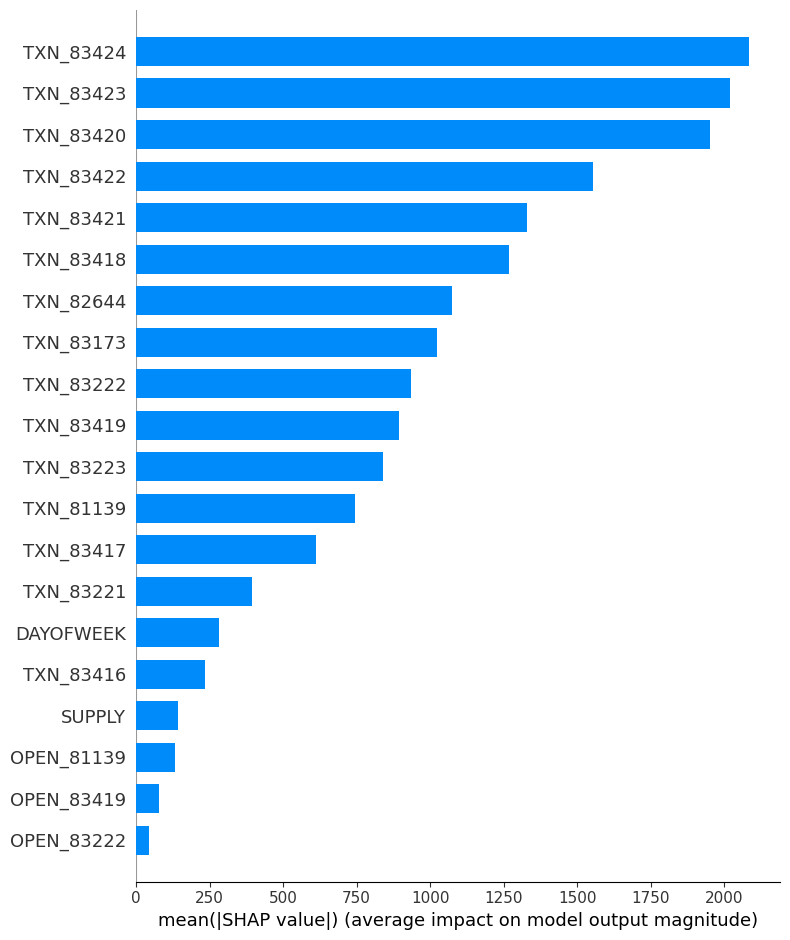

In [ ]:
# plot the feature importance
shap.summary_plot(shap_values, x_test_onehot, plot_type="bar")

# Causal Machine Learning

In [ ]:
# order feature names according to shap values
vals = np.abs(shap_values.values).mean(0)

# collect data for features importances
feature_importance = pd.DataFrame(
    list(zip(shap_values.feature_names, vals)), columns=["features", "importance"]
)


feature_importance.sort_values(by=["importance"], ascending=False, inplace=True)

# keep top k features for causal analysis
k = 5

sorted_features = feature_importance["features"]


top_k_features = list(sorted_features.values)[:20]

In [ ]:
top_k_features

['TXN_83424',
 'TXN_83423',
 'TXN_83420',
 'TXN_83422',
 'TXN_83421',
 'TXN_83418',
 'TXN_82644',
 'TXN_83173',
 'TXN_83222',
 'TXN_83419',
 'TXN_83223',
 'TXN_81139',
 'TXN_83417',
 'TXN_83221',
 'DAYOFWEEK',
 'TXN_83416',
 'SUPPLY',
 'OPEN_81139',
 'OPEN_83419',
 'OPEN_83222']

In [ ]:
from econml.solutions.causal_analysis import CausalAnalysis

# initialize heterogeneity features
heterogeneous_cols = ['SUPPLY', 'RATE']

In [ ]:
onehot_X.columns.to_list()

['OPEN_81139',
 'TXN_81139',
 'CLOSE_81139',
 'ADENOM_81139',
 'AMAXBILLS_81139',
 'BDENOM_81139',
 'CDENOM_81139',
 'MAXLOADCALC_81139',
 'OPEN_82644',
 'TXN_82644',
 'CLOSE_82644',
 'ADENOM_82644',
 'AMAXBILLS_82644',
 'BDENOM_82644',
 'CDENOM_82644',
 'MAXLOADCALC_82644',
 'OPEN_83173',
 'TXN_83173',
 'CLOSE_83173',
 'ADENOM_83173',
 'AMAXBILLS_83173',
 'BDENOM_83173',
 'CDENOM_83173',
 'MAXLOADCALC_83173',
 'OPEN_83221',
 'TXN_83221',
 'CLOSE_83221',
 'ADENOM_83221',
 'AMAXBILLS_83221',
 'BDENOM_83221',
 'CDENOM_83221',
 'MAXLOADCALC_83221',
 'OPEN_83222',
 'TXN_83222',
 'CLOSE_83222',
 'ADENOM_83222',
 'AMAXBILLS_83222',
 'BDENOM_83222',
 'CDENOM_83222',
 'MAXLOADCALC_83222',
 'OPEN_83223',
 'TXN_83223',
 'CLOSE_83223',
 'ADENOM_83223',
 'AMAXBILLS_83223',
 'BDENOM_83223',
 'CDENOM_83223',
 'MAXLOADCALC_83223',
 'OPEN_83422',
 'TXN_83422',
 'CLOSE_83422',
 'ADENOM_83422',
 'AMAXBILLS_83422',
 'BDENOM_83422',
 'CDENOM_83422',
 'MAXLOADCALC_83422',
 'OPEN_83417',
 'TXN_83417',
 'CLO

In [ ]:
categorical_data = ['DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday',
 'ATMCASHED_83423_OHE_N',
 'ATMCASHED_83423_OHE_Y',
 'ATMCASHED_83422_OHE_N',
 'ATMCASHED_83422_OHE_Y',
 'ATMCASHED_83420_OHE_N',
 'ATMCASHED_83420_OHE_Y',
 'ATMCASHED_83421_OHE_N',
 'ATMCASHED_83421_OHE_Y',
 'ATMCASHED_83419_OHE_N',
 'ATMCASHED_83419_OHE_Y',
 'ATMCASHED_83223_OHE_N',
 'ATMCASHED_83223_OHE_Y',
 'ATMCASHED_83222_OHE_N',
 'ATMCASHED_83222_OHE_Y',
 'ATMCASHED_83418_OHE_N',
 'ATMCASHED_83418_OHE_Y',
 'ATMCASHED_83424_OHE_N',
 'ATMCASHED_83424_OHE_Y',
 'ATMCASHED_83221_OHE_N',
 'ATMCASHED_83221_OHE_Y',
 'ATMCASHED_83416_OHE_N',
 'ATMCASHED_83416_OHE_Y',
 'ATMCASHED_83417_OHE_N',
 'ATMCASHED_83417_OHE_Y',
 'ATMCASHED_83173_OHE_N',
 'ATMCASHED_83173_OHE_Y',
 'ATMCASHED_82644_OHE_N',
 'ATMCASHED_82644_OHE_Y',
 'ATMCASHED_81139_OHE_N',
 'ATMCASHED_81139_OHE_Y']

In [ ]:
len(categorical_data)

41

In [ ]:
# create the causal machine learning model
causal_analysis = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

### Run Causal Machine Learning

### Warning: on Google's CPU (and not GPU) base runtime environment, the causal analysis of ATMS will run for approximately 45 or more minutes.

### On better computing resources (such as on a local PC using Apple's M3 chip), this process will take approximately 15 minutes

In [ ]:
# run casual machine learning on training data
causal_analysis.fit(x_train_onehot, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7573
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 79
[LightGBM] [Info] Start training from score 37369.438878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


# Predictions

## Predictive Population Effects of Treatments and Policies

### The Global Population Effect - Average Treatment Effect (ATE)

In [ ]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects = causal_analysis.global_causal_effect(alpha=0.05)

# sort by p-values: significant if pvalue < 0.05
global_population_effects.sort_values(by="p_value")

In [ ]:
global_population_effects['FEATURE'] = global_population_effects.index

In [ ]:
global_population_effects

,,point,stderr,zstat,p_value,ci_lower,ci_upper,FEATURE
feature,feature_value,,,,,,,
TXN_83424,num,2.017900e+00,0.006410,3.148096e+02,0.000000e+00,2.005337e+00,2.030463e+00,"(TXN_83424, num)"
TXN_83423,num,-1.227684e+00,0.005326,-2.304895e+02,0.000000e+00,-1.238123e+00,-1.217244e+00,"(TXN_83423, num)"
TXN_83420,num,2.898537e+00,0.006411,4.521448e+02,0.000000e+00,2.885972e+00,2.911101e+00,"(TXN_83420, num)"
TXN_83422,num,1.126353e+00,0.000000,inf,0.000000e+00,1.126353e+00,1.126353e+00,"(TXN_83422, num)"
TXN_83421,num,9.105640e-01,0.007516,1.211575e+02,0.000000e+00,8.958338e-01,9.252942e-01,"(TXN_83421, num)"
TXN_83418,num,4.134809e+00,0.008343,4.956013e+02,0.000000e+00,4.118457e+00,4.151161e+00,"(TXN_83418, num)"
TXN_82644,num,7.899666e-01,0.004452,1.774234e+02,0.000000e+00,7.812400e-01,7.986932e-01,"(TXN_82644, num)"
TXN_83173,num,-2.372995e-01,0.000000,-inf,0.000000e+00,-2.372995e-01,-2.372995e-01,"(TXN_83173, num)"
TXN_83222,num,1.617881e+00,0.007585,2.133085e+02,0.000000e+00,1.603015e+00,1.632747e+00,"(TXN_83222, num)"


In [ ]:
global_population_effects.to_csv('/content/drive/MyDrive/engineered/global_population_effects.csv', index=False)

In [ ]:
# helper function to plot error bar
def errorbar(res):
    xticks = res.index.get_level_values(0)
    lowererr = res["point"] - res["ci_lower"]
    uppererr = res["ci_upper"] - res["point"]
    xticks = [
        "{}***".format(t)
        if p < 1e-6
        else ("{}**".format(t) if p < 1e-3 else ("{}*".format(t) if p < 1e-2 else t))
        for t, p in zip(xticks, res["p_value"])
    ]
    plot_title = "Direct Causal Effect of Each Feature with 95% Confidence Interval, "
    plt.figure(figsize=(15, 5))
    plt.errorbar(
        np.arange(len(xticks)),
        res["point"],
        yerr=[lowererr, uppererr],
        fmt="o",
        capsize=5,
        capthick=1,
        barsabove=True,
    )
    plt.xticks(np.arange(len(xticks)), xticks, rotation=45)
    plt.title(plot_title)
    plt.axhline(0, color="r", linestyle="--", alpha=0.5)
    plt.ylabel("Average Treatment Effect")

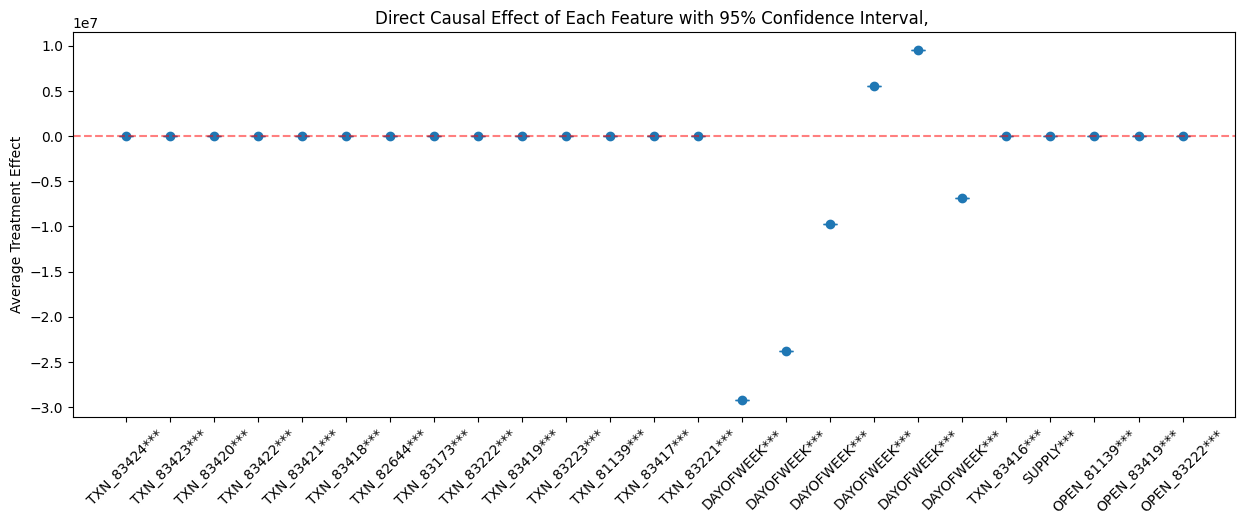

In [ ]:
%matplotlib inline
errorbar(global_population_effects)

In [ ]:
# initialize heterogeneity features
heterogeneous_cols = ['SUPPLY', 'RATE']

In [ ]:
# create the causal machine learning model
causal_analysis_hetero = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    heterogeneity_inds=['SUPPLY', 'RATE'],

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

In [ ]:
# run casual machine learning on training data
causal_analysis_hetero.fit(x_train_onehot, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7573
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 79
[LightGBM] [Info] Start training from score 37369.438878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects_hetero = causal_analysis_hetero.global_causal_effect(alpha=0.05)


global_population_effects_hetero.sort_values(by="p_value")

,,point,stderr,zstat,p_value,ci_lower,ci_upper
feature,feature_value,,,,,,
TXN_83424,num,1.299304e+00,0.012138,107.046675,0.000000e+00,1.275515e+00,1.323094e+00
SUPPLY,num,2.039246e-02,0.000294,69.251282,0.000000e+00,1.981531e-02,2.096961e-02
TXN_83416,num,2.069484e+01,0.186583,110.914682,0.000000e+00,2.032914e+01,2.106054e+01
TXN_83221,num,1.585137e+01,0.152663,103.832589,0.000000e+00,1.555216e+01,1.615059e+01
TXN_83223,num,1.965838e+00,0.027839,70.613595,0.000000e+00,1.911274e+00,2.020402e+00
TXN_83419,num,2.218484e+00,0.029935,74.109789,0.000000e+00,2.159812e+00,2.277156e+00
TXN_83222,num,1.938130e+00,0.021173,91.537593,0.000000e+00,1.896631e+00,1.979628e+00
TXN_83417,num,1.852939e+00,0.023689,78.219461,0.000000e+00,1.806509e+00,1.899369e+00
TXN_82644,num,2.158717e+00,0.019915,108.396789,0.000000e+00,2.119684e+00,2.197750e+00


In [ ]:
global_population_effects_hetero.to_csv('/content/drive/MyDrive/engineered/global_population_effects_hetero.csv', index=False)

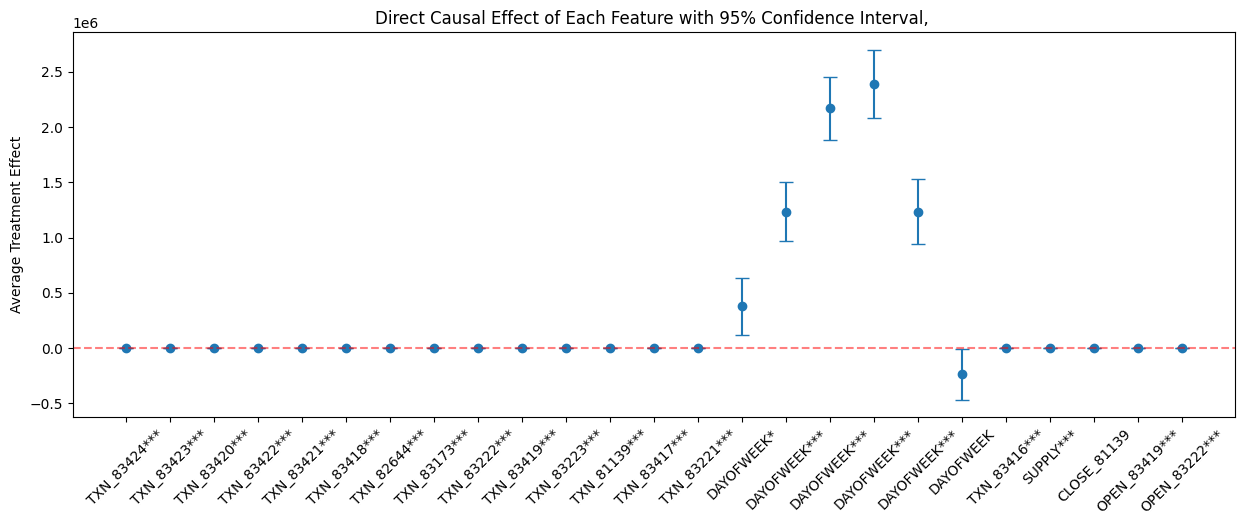

In [ ]:
errorbar(global_population_effects_hetero)

# We see that the DAYS OF THE WEEK are the causal factors for DEMAND for CASH at the ATMs

# What IF Analysis

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

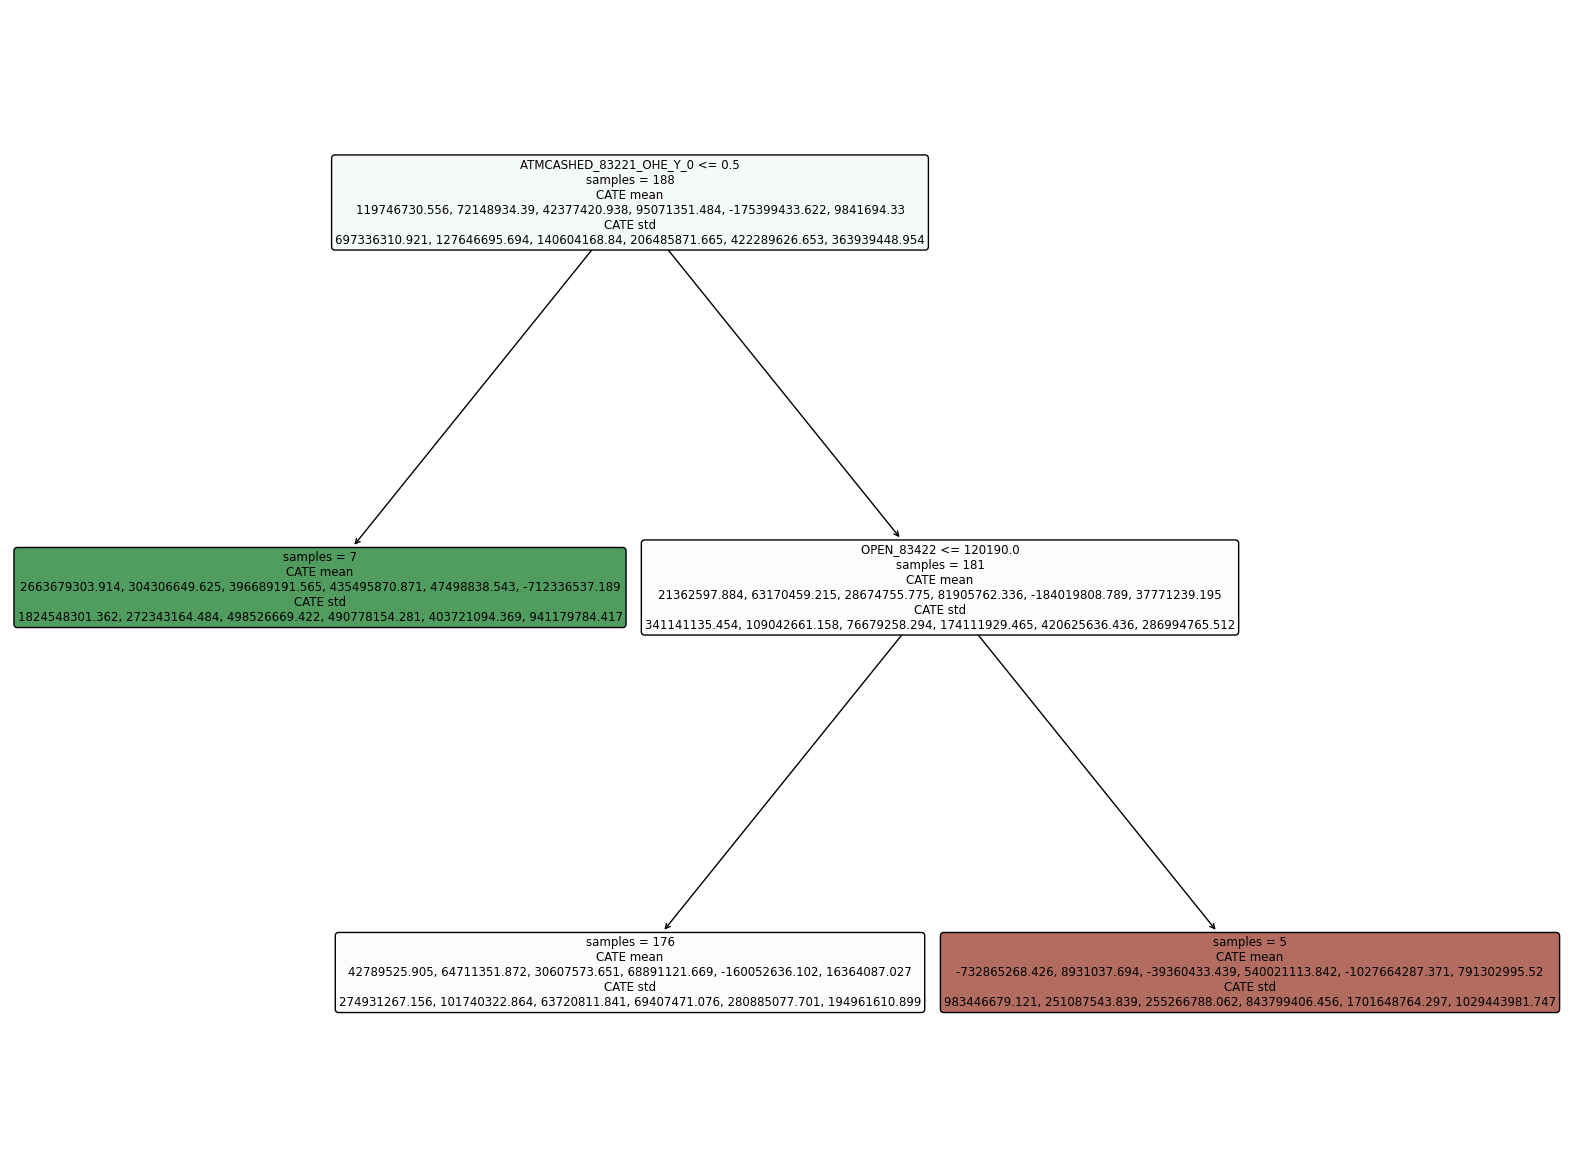

In [ ]:
plt.figure(figsize=(20, 15))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "DAYOFWEEK",
    max_depth=2,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

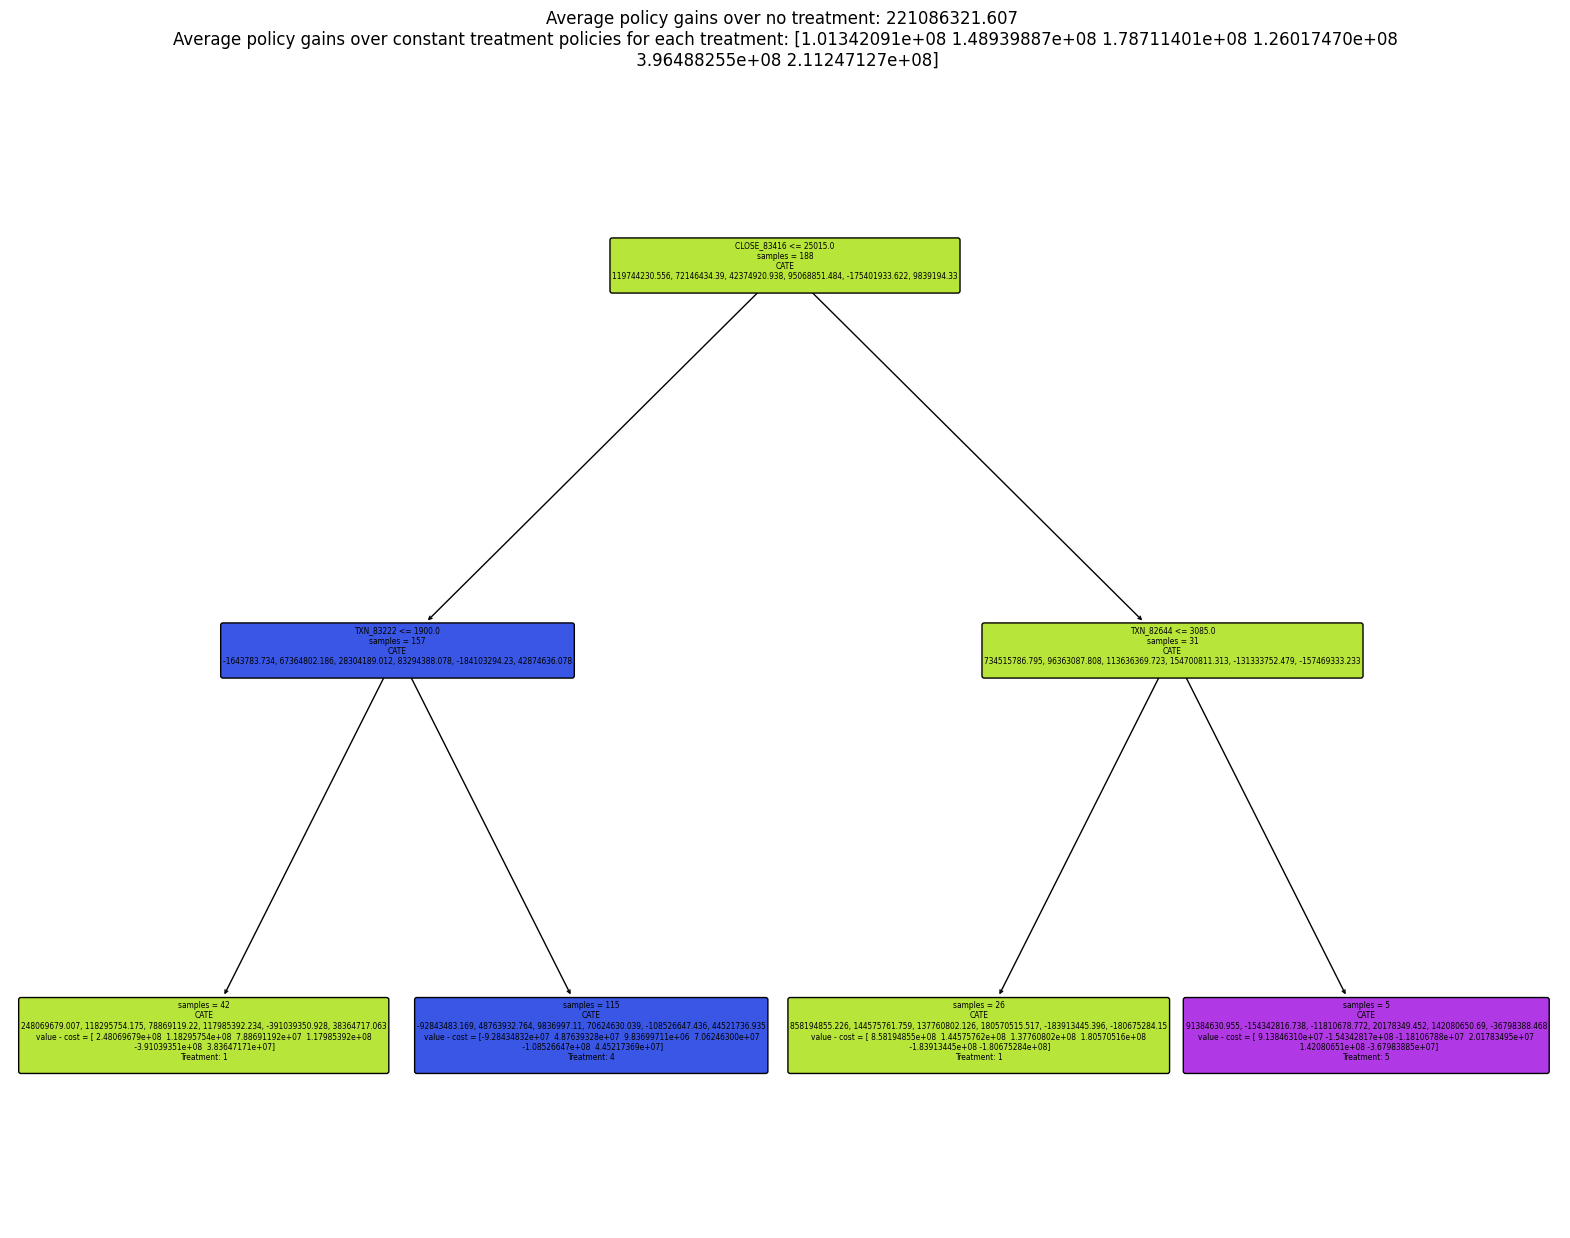

In [ ]:
plt.figure(figsize=(20, 15))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "DAYOFWEEK",
    treatment_costs=2500,
    max_depth=2,
    min_samples_leaf = 5
)

In [ ]:
plt.figure(figsize=(12, 8))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "SUPPLY",
    treatment_costs=126000,
    max_depth=2,
    min_samples_leaf = 5
)